In [31]:
import pandas as pd   # 1.columns, shape check
import numpy as np   
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

try:
    train_data = pd.read_csv(r'D:\0.dissertation\fraudTrain.csv')
    test_data = pd.read_csv(r'D:\0.dissertation\fraudTest.csv')
    print("Train and test data loaded successfully.")

    print(f"Train Data Columns: {train_data.columns.tolist()}")# columns and size
    print(f"Test Data Columns: {test_data.columns.tolist()}")
    print(f"Train Data Shape: {train_data.shape}")
    print(f"Test Data Shape: {test_data.shape}")

except Exception as e:
    print(f"Error loading data: {e}")

Train and test data loaded successfully.
Train Data Columns: ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']
Test Data Columns: ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']
Train Data Shape: (1296675, 23)
Test Data Shape: (555719, 23)


In [32]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [33]:
import pandas as pd#2.basic info
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'D:\0.dissertation\fraudTrain.csv')
df = df.drop(columns=['Unnamed: 0'])# Drop 'Unnamed: 0' column

print("1. Basic Information:")
df_info = df.info()  # non-null counts

df = df.drop(columns=['cc_num', 'merchant', 'category', 'first', 'last', # Drop unnecessary columns 
                      'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 
                      'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 
                      'merch_lat', 'merch_long', 'is_fraud'])

print("\n2. Summary Statistics:")# entire dataset's amt
summary_stats = df.describe().to_string(float_format="{:,.0f}".format)  # Use float format to display integers
print(summary_stats)

1. Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 

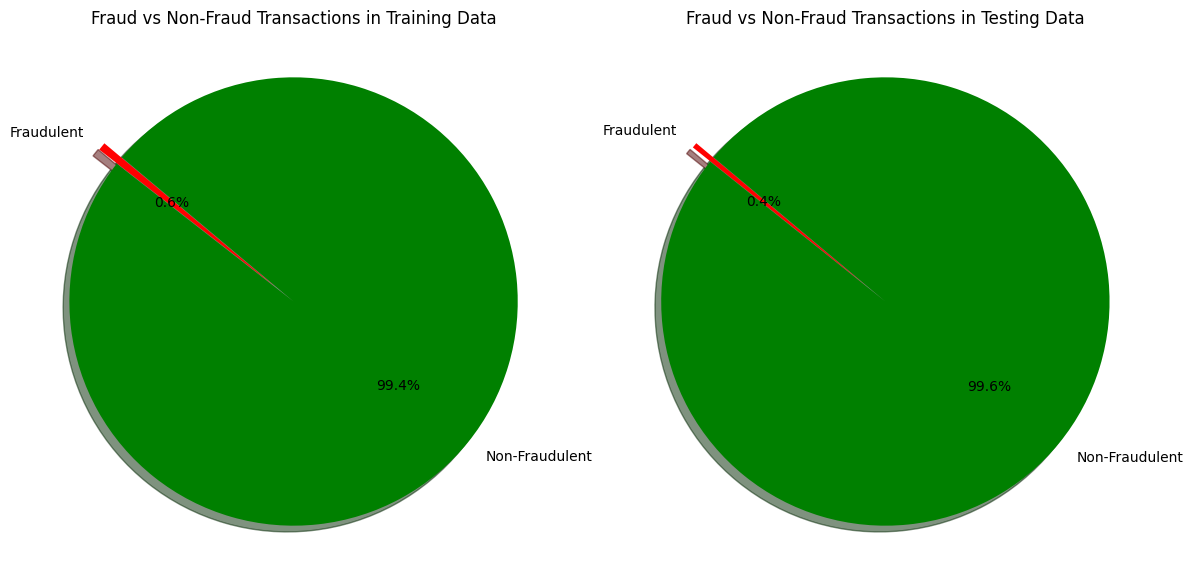

Fraudulent transactions in Training Data: 7506
Fraudulent transactions in Testing Data: 2145


In [34]:
import pandas as pd#3.fraud or not(unbalance)
import matplotlib.pyplot as plt

try:
    total_train = len(train_data)
    fraud_count_train = train_data['is_fraud'].sum()
    non_fraud_count_train = total_train - fraud_count_train

    total_test = len(test_data)
    fraud_count_test = test_data['is_fraud'].sum()
    non_fraud_count_test = total_test - fraud_count_test

    labels = ['Fraudulent', 'Non-Fraudulent']
    train_sizes = [fraud_count_train, non_fraud_count_train]
    test_sizes = [fraud_count_test, non_fraud_count_test]
    colors = ['red', 'green']

    plt.figure(figsize=(14, 7))

    plt.subplot(1, 2, 1)
    plt.pie(train_sizes, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=140, explode=(0.1, 0))
    plt.title('Fraud vs Non-Fraud Transactions in Training Data')
    plt.axis('equal')

    plt.subplot(1, 2, 2)
    plt.pie(test_sizes, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=140, explode=(0.1, 0))
    plt.title('Fraud vs Non-Fraud Transactions in Testing Data')
    plt.axis('equal')

    plt.show()

    print(f"Fraudulent transactions in Training Data: {fraud_count_train}")
    print(f"Fraudulent transactions in Testing Data: {fraud_count_test}")

except Exception as e:
    print(f"Error processing data: {e}")

Total number of fraudulent transactions: 7506
Highest fraudulent transaction amount: 1376.04 USD


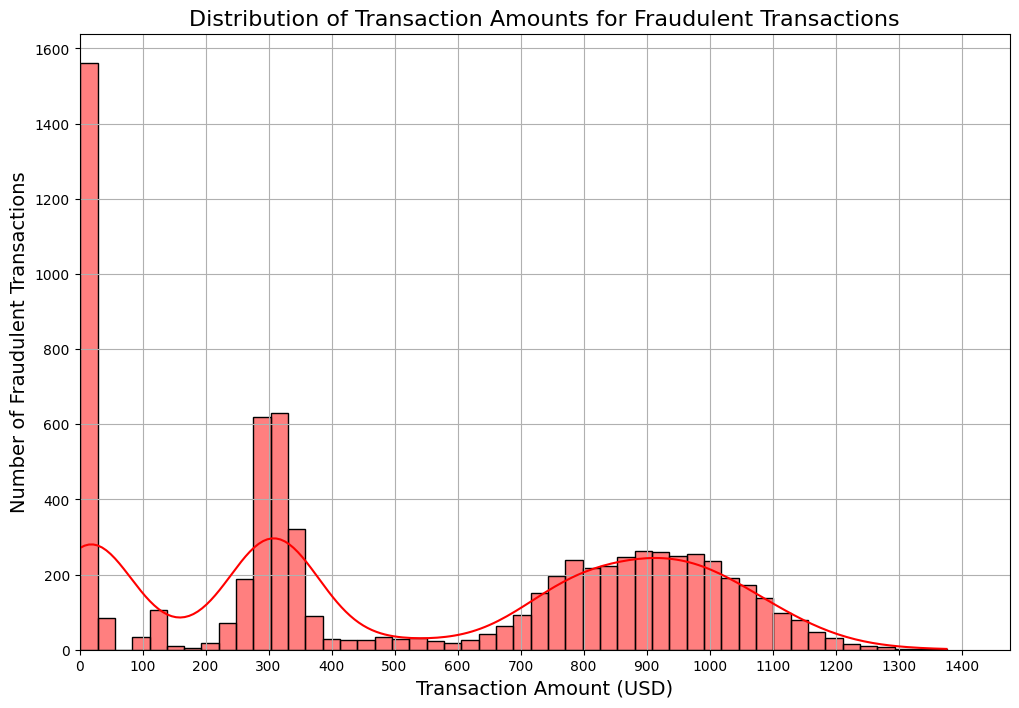

In [35]:
import pandas as pd#4.amounts for fraud
import matplotlib.pyplot as plt
import seaborn as sns
fraudulent_data = train_data[train_data['is_fraud'] == 1]# training
print(f"Total number of fraudulent transactions: {fraudulent_data.shape[0]}") # check

max_fraud_amount = fraudulent_data['amt'].max()# verify data coverage
print(f"Highest fraudulent transaction amount: {max_fraud_amount} USD")

plt.figure(figsize=(12, 8))# distribution
sns.histplot(fraudulent_data['amt'], bins=50, color='red', kde=True)

plt.title('Distribution of Transaction Amounts for Fraudulent Transactions', fontsize=16)
plt.xlabel('Transaction Amount (USD)', fontsize=14)
plt.ylabel('Number of Fraudulent Transactions', fontsize=14)
plt.grid(True)

plt.xlim(0, max_fraud_amount + 100)# covered all
plt.xticks(range(0, int(max_fraud_amount) + 101, 100))
plt.show()#Use a small amount to test the card's effectiveness, and then use a large amount to maximize benefits.

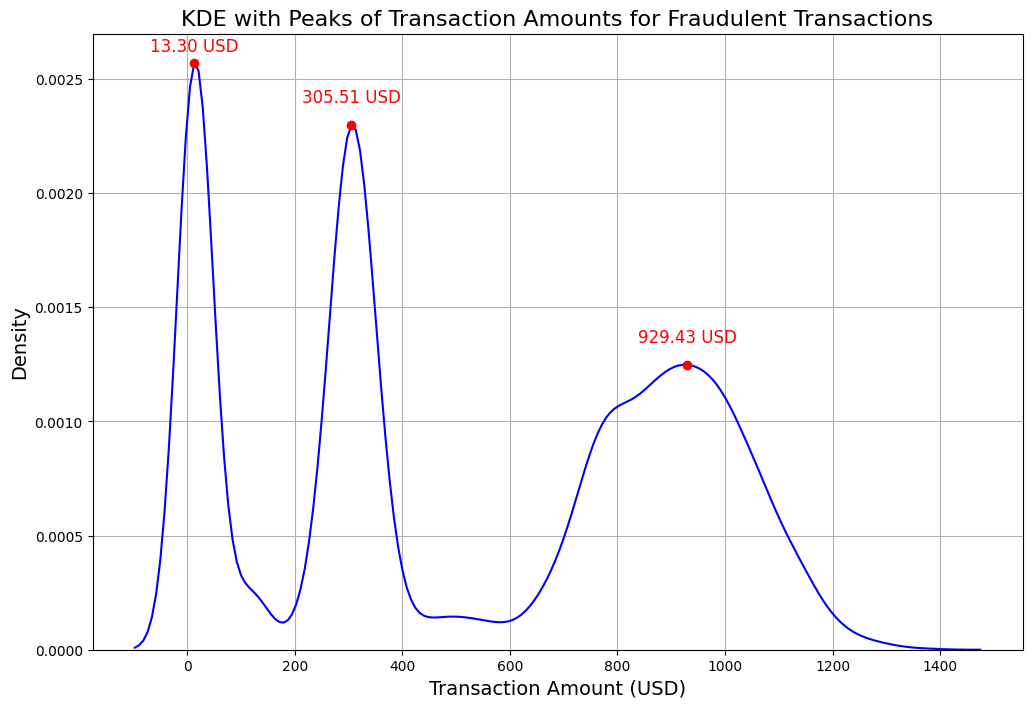

Height / Location (USD) / Transaction amount range / Number of transactions (percentage)
Peak 1: 0.00 / 13.30 / -26.19 - 52.78 / 1644 (22%)
Peak 2: 0.00 / 305.51 / 266.02 - 345.00 / 1535 (20%)
Peak 3: 0.00 / 929.43 / 889.94 - 968.92 / 750 (10%)


In [36]:
import numpy as np #5.kernel density estimate three peaks, range, %:Peak 1 biggest / 13.30 / -26.19 - 52.78 / 1644 (22%)
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
kde = sns.kdeplot(fraudulent_data['amt'], bw_adjust=0.5, color='blue')  # KDE curve (concentration)

x, y = kde.get_lines()[0].get_data()  # Extract x and y values
peaks, _ = find_peaks(y, height=0)  # Find peaks (local maxima)
peak_values = sorted(zip(y[peaks], x[peaks]), reverse=True)[:3]# three highest

for i, (height, loc) in enumerate(peak_values):# Plot peaks
    offset = 0.00005 if i == 0 else 0.0001  # Adjust the upward movement of the first
    plt.plot(loc, height, 'ro')  # 'ro' for red dot
    plt.text(loc, height + offset, f'{loc:.2f} USD', fontsize=12, color='red', ha='center')  # Shift text

plt.title('KDE with Peaks of Transaction Amounts for Fraudulent Transactions', fontsize=16)
plt.xlabel('Transaction Amount (USD)', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.grid(True)
plt.show()

total_fraudulent_transactions = len(fraudulent_data)# total number

print("Height / Location (USD) / Transaction amount range / Number of transactions (percentage)")
for i, (height, loc) in enumerate(peak_values, 1):# details
    lower_bound = loc - (x[1] - x[0]) * 5
    upper_bound = loc + (x[1] - x[0]) * 5
    count_in_range = len(fraudulent_data[(fraudulent_data['amt'] >= lower_bound) & (fraudulent_data['amt'] <= upper_bound)])
    percentage_in_range = (count_in_range / total_fraudulent_transactions) * 100
    print(f"Peak {i}: {height:.2f} / {loc:.2f} / {lower_bound:.2f} - {upper_bound:.2f} / {count_in_range} ({percentage_in_range:.0f}%)")

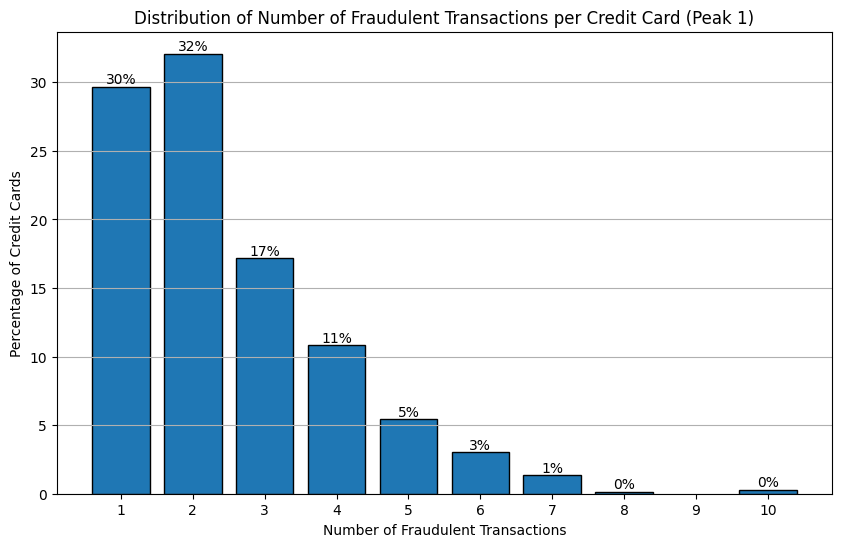

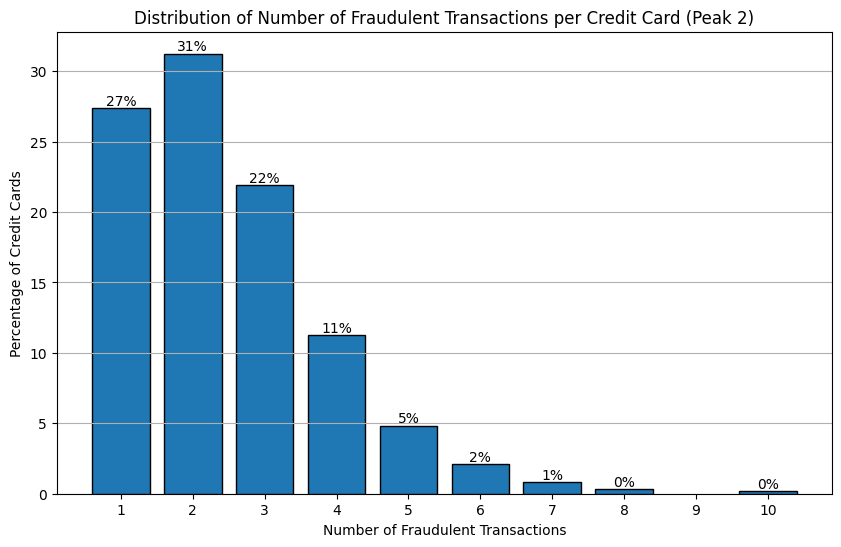

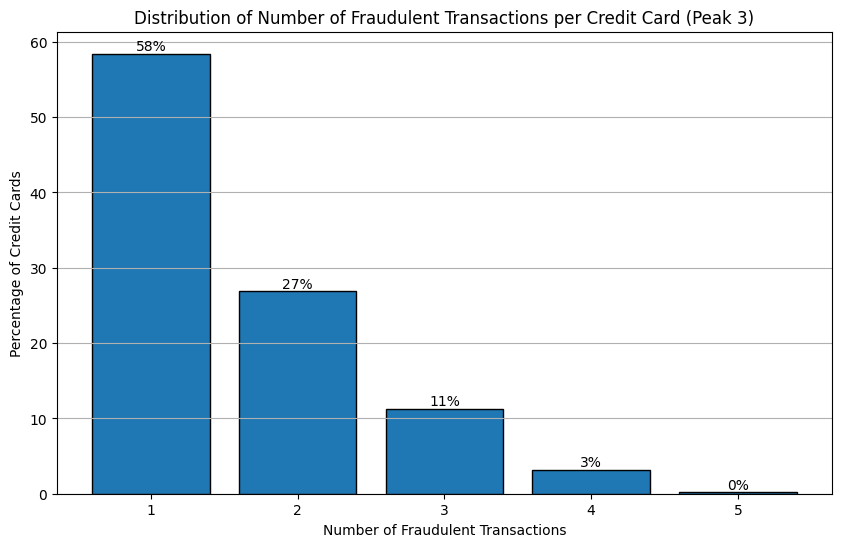

In [37]:
import pandas as pd#6. transactions in 1~3 time more than 78%
import matplotlib.pyplot as plt

df = pd.read_csv(r'D:\0.dissertation\fraudTrain.csv')
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])# format

peak_ranges = {
    "Peak 1": (0, 52.78),
    "Peak 2": (266.02, 345.00),
    "Peak 3": (889.94, 968.92)}

for peak_name, (lower_bound, upper_bound) in peak_ranges.items():# distribution
    filtered_transactions = df[(df['amt'] >= lower_bound) & (df['amt'] <= upper_bound) & (df['is_fraud'] == 1)]# range
    fraud_transaction_count_per_card = filtered_transactions.groupby('cc_num').size()    # card's transactions
    sorted_fraud_transaction_count = fraud_transaction_count_per_card.sort_values(ascending=False)
    transaction_count_distribution = sorted_fraud_transaction_count.value_counts(normalize=True).sort_index(ascending=False) * 100

    plt.figure(figsize=(10, 6))# distribution
    bars = plt.bar(transaction_count_distribution.index, transaction_count_distribution, edgecolor='black')
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}%', ha='center', va='bottom')
    
    plt.title(f'Distribution of Number of Fraudulent Transactions per Credit Card ({peak_name})')
    plt.xlabel('Number of Fraudulent Transactions')
    plt.ylabel('Percentage of Credit Cards')
    plt.xticks(range(1, sorted_fraud_transaction_count.max() + 1))
    plt.grid(axis='y')
    plt.show()

In [38]:
#7.time difference consecutive fraud mean 4 hours but min 1 second

In [39]:
import pandas as pd
import os
from datetime import datetime

def process_dataset(file_path, version):# dataset
    df = pd.read_csv(file_path)
    
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])# to datetime format
    
    df = df.sort_values(by=['cc_num', 'trans_date_trans_time'])# Sort by card number and transaction time
    
    df['time_diff_seconds'] = df.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds().fillna(0).astype(int)# time difference between transactions in seconds
    
    df['time_diff_hours'] = (df['time_diff_seconds'] / 3600).round(0).astype(int)# hours and minutes
    df['time_diff_minutes'] = (df['time_diff_seconds'] / 60).round(0).astype(int)
    
    if 'time_diff' in df.columns:# Remove duplicate 'time_diff'
        df = df.drop(columns=['time_diff'])
    
    current_time = datetime.now().strftime("%Y%m%d_%H%M%S")# version control and update description
    update_description = "Added time_diff features in hours, minutes, and seconds for all transactions. Removed duplicate time_diff column."
    
    output_file_path = f'D:\\dissertation\\{os.path.basename(file_path).replace(".csv", "")}_{version}_{current_time}.csv'# Define path for the updated
    df.to_csv(output_file_path, index=False)
    
    new_columns = ['time_diff_seconds', 'time_diff_hours', 'time_diff_minutes']# check new columns added
    new_columns_count = len(new_columns)
    
    print(f"Updated dataset saved to {output_file_path}")# version details
    print(f"Version: {version}")
    print(f"Update Time: {current_time}")
    print(f"Description: {update_description}")
    print(f"Number of new columns added: {new_columns_count}")
    print(f"New columns added: {new_columns}")
    
    total_columns = len(df.columns)# check total columns
    print(f"Total Columns in the updated dataset: {total_columns}")
    print("Columns in the updated dataset:")
    print(df.columns)

train_file_path = r'D:\0.dissertation\fraudTrain.csv'# Process training 
process_dataset(train_file_path, version="v1")

test_file_path = r'D:\0.dissertation\fraudTest.csv'# Process testing
process_dataset(test_file_path, version="v1")

Updated dataset saved to D:\dissertation\fraudTrain_v1_20250703_091743.csv
Version: v1
Update Time: 20250703_091743
Description: Added time_diff features in hours, minutes, and seconds for all transactions. Removed duplicate time_diff column.
Number of new columns added: 3
New columns added: ['time_diff_seconds', 'time_diff_hours', 'time_diff_minutes']
Total Columns in the updated dataset: 26
Columns in the updated dataset:
Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'time_diff_seconds',
       'time_diff_hours', 'time_diff_minutes'],
      dtype='object')
Updated dataset saved to D:\dissertation\fraudTest_v1_20250703_091815.csv
Version: v1
Update Time: 20250703_091815
Description: Added time_diff features in hours, minutes, and seconds for all transactions. 

In [40]:
#check

In [41]:
#outliers could interfere with the model's learning
#cleaning then smote for balancing the data distribution
#8.spark Create SparkSession with memory configurations. Get current Spark configurations

In [43]:
import pandas as pd# Feature engineering: transaction frequency, average transaction amount, and standard deviation of transaction amount
import numpy as np

file_path = r'D:\0.dissertation\fraudTrain.csv'

df_train = pd.read_csv(file_path)# Read

transaction_frequency = df_train.groupby("cc_num").size().reset_index(name='transaction_count')
average_transaction_amount = df_train.groupby("cc_num")['amt'].mean().reset_index(name='avg_transaction_amt')
std_transaction_amount = df_train.groupby("cc_num")['amt'].std().reset_index(name='std_transaction_amt')

df_train = df_train.merge(transaction_frequency, on="cc_num", how="left")# Merge features to original DataFrame
df_train = df_train.merge(average_transaction_amount, on="cc_num", how="left")
df_train = df_train.merge(std_transaction_amount, on="cc_num", how="left")

print("\nStatistical Summary of New Features (Train Data):")# Print new features(integer)
print(df_train[['transaction_count', 'avg_transaction_amt', 'std_transaction_amt']].describe().astype(int))


Statistical Summary of New Features (Train Data):
       transaction_count  avg_transaction_amt  std_transaction_amt
count            1296675              1296675              1296675
mean                1818                   70                  141
std                  742                   19                   73
min                    7                   42                   60
25%                 1466                   59                  103
50%                 2000                   65                  122
75%                 2524                   83                  149
max                 3123                  948                 1202


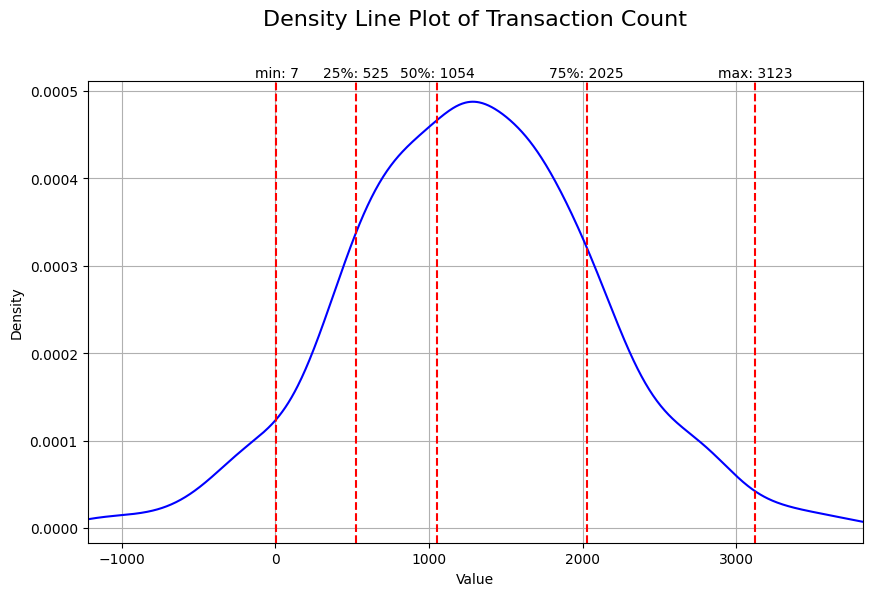

In [44]:
import matplotlib.pyplot as plt#10.transaction, amt, std amt visualization
import numpy as np
from scipy.stats import gaussian_kde

summary = {'mean': 1319, 'std': 812, 'min': 7, '25%': 525, '50%': 1054, '75%': 2025, 'max': 3123}

def plot_density(summary, title):
    simulated_data = np.random.normal(summary['mean'], summary['std'], 1000)
    
    density = gaussian_kde(simulated_data)
    x_vals = np.linspace(min(simulated_data), max(simulated_data), 1000)
    density_vals = density(x_vals)

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, density_vals, color='blue')

    y_max = max(density_vals)
    y_offset = y_max * 0.05
    for i, key in enumerate(['min', '25%', '50%', '75%', 'max']):
        x_pos = summary[key]
        plt.axvline(x_pos, color='red', linestyle='--')
        plt.text(x_pos, y_max + y_offset, f'{key}: {summary[key]}', 
                 horizontalalignment='center', verticalalignment='bottom', color='black')

    plt.title(f'Density Line Plot of {title}', fontsize=16, pad=40)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.xlim(min(x_vals), max(x_vals))
    plt.show()

plot_density(summary, 'Transaction Count')

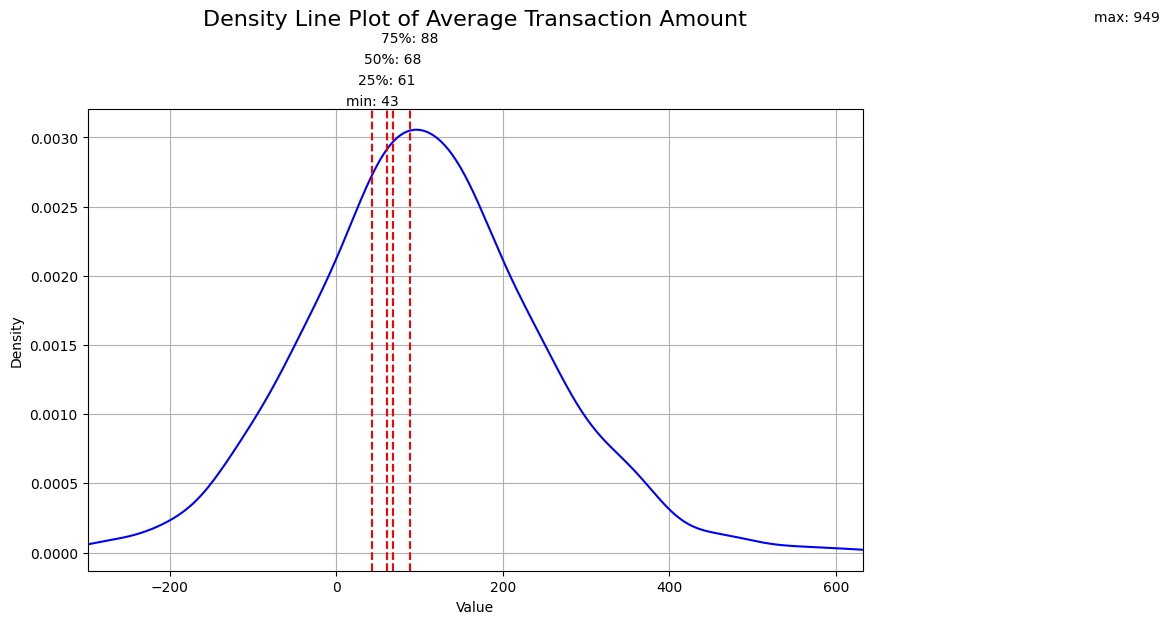

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

summary = {'mean': 111, 'std': 147, 'min': 43, '25%': 61, '50%': 68, '75%': 88, 'max': 949}

def plot_density(summary, title):
    simulated_data = np.random.normal(summary['mean'], summary['std'], 1000)
    
    density = gaussian_kde(simulated_data) # density
    x_vals = np.linspace(min(simulated_data), max(simulated_data), 1000)
    density_vals = density(x_vals)

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, density_vals, color='blue')

    y_max = max(density_vals)    # statistics
    y_offset = y_max * 0.05  # Base offset for the labels
    for i, key in enumerate(['min', '25%', '50%', '75%', 'max']):
        x_pos = summary[key]
        plt.axvline(x_pos, color='red', linestyle='--')
        plt.text(x_pos, y_max + (i + 1) * y_offset, f'{key}: {summary[key]}', 
                 horizontalalignment='center', verticalalignment='bottom', color='black')

    plt.title(f'Density Line Plot of {title}', fontsize=16, pad=60)# higher title 
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.xlim(min(x_vals), max(x_vals))
    plt.show()

plot_density(summary, 'Average Transaction Amount')

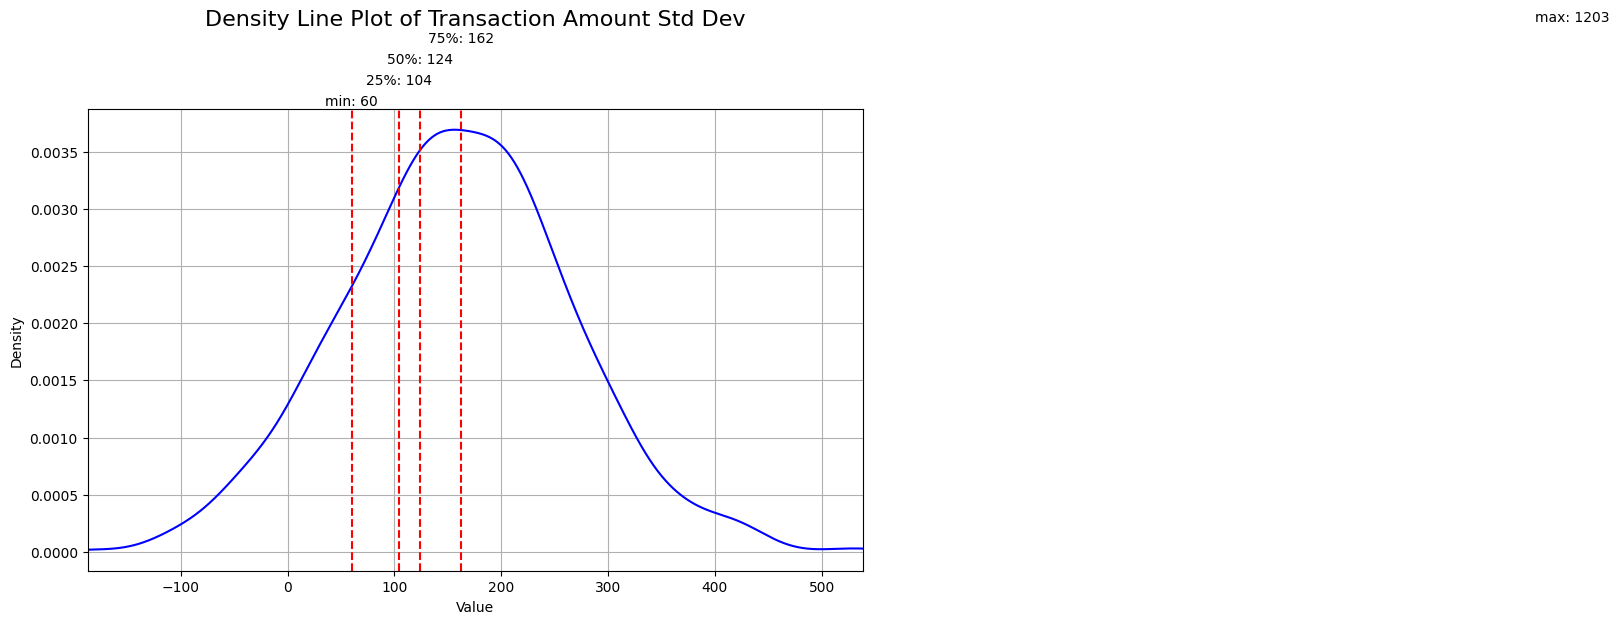

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

summary = {'mean': 159, 'std': 104, 'min': 60, '25%': 104, '50%': 124, '75%': 162, 'max': 1203}# Summary statistics for Transaction Amount Std Dev

def plot_density(summary, title):
    simulated_data = np.random.normal(summary['mean'], summary['std'], 1000)
    
    density = gaussian_kde(simulated_data)
    x_vals = np.linspace(min(simulated_data), max(simulated_data), 1000)
    density_vals = density(x_vals)

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, density_vals, color='blue')

    y_max = max(density_vals)
    y_offset = y_max * 0.05
    for i, key in enumerate(['min', '25%', '50%', '75%', 'max']):
        x_pos = summary[key]
        plt.axvline(x_pos, color='red', linestyle='--')

        plt.text(x_pos, y_max + (i + 1) * y_offset, f'{key}: {summary[key]}', # space out the labels
                 horizontalalignment='center', verticalalignment='bottom', color='black')

    plt.title(f'Density Line Plot of {title}', fontsize=16, pad=60)  # Increased padding for the title
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.xlim(min(x_vals), max(x_vals))
    plt.show()

plot_density(summary, 'Transaction Amount Std Dev')

In [49]:
import pandas as pd#11-1 miss and duplicate

df_train = pd.read_csv(r'D:\0.dissertation\fraudTrain.csv')
df_test = pd.read_csv(r'D:\0.dissertation\fraudTest.csv')

if df_train.isnull().sum().sum() == 0:
    print("There are no missing values in the training dataset.")
else:
    print("1. There are missing values in the training dataset.")

if df_test.isnull().sum().sum() == 0:
    print("There are no missing values in the testing dataset.")
else:
    print("1. There are missing values in the testing dataset.")

duplicates_train = df_train.duplicated().sum()
if duplicates_train == 0:
    print("There are no duplicate rows in the training dataset.")
else:
    print(f"2. There are {duplicates_train} duplicate rows in the training dataset.")

duplicates_test = df_test.duplicated().sum()
if duplicates_test == 0:
    print("There are no duplicate rows in the testing dataset.")
else:
    print(f"2. There are {duplicates_test} duplicate rows in the testing dataset.")

There are no missing values in the training dataset.
There are no missing values in the testing dataset.
There are no duplicate rows in the training dataset.
There are no duplicate rows in the testing dataset.


In [ ]:
#11-2-1 convert time and fraud

In [51]:
import pandas as pd
from datetime import datetime
import os

train_file = r'D:\dissertation\fraudTrain_v1_20250703_091743.csv'# latest CSV files
test_file = r'D:\dissertation\fraudTest_v1_20250703_091815.csv'

df_train = pd.read_csv(train_file)# Read
df_test = pd.read_csv(test_file)

df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])# datetime format
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])

df_train['is_fraud'] = df_train['is_fraud'].astype('category')# categorical type
df_test['is_fraud'] = df_test['is_fraud'].astype('category')

print("Training Data (First 5 rows):")
print(df_train.head().to_string(index=False))
print("\nTest Data (First 5 rows):")
print(df_test.head().to_string(index=False))

current_time = datetime.now().strftime("%Y%m%d_%H%M%S")# v2 with a timestamp
train_output_file = f'D:\\dissertation\\fraudTrain_v2_{current_time}.csv'
test_output_file = f'D:\\dissertation\\fraudTest_v2_{current_time}.csv'

df_train.to_csv(train_output_file, index=False)
df_test.to_csv(test_output_file, index=False)

print(f"\nProcessed training data saved to: {train_output_file}")
print(f"Processed test data saved to: {test_output_file}")
print(f"Version: v2")
print(f"Update Time: {current_time}")

Training Data (First 5 rows):
 Unnamed: 0 trans_date_trans_time      cc_num                          merchant      category   amt first last gender           street          city state   zip     lat      long  city_pop                         job        dob                        trans_num  unix_time  merch_lat  merch_long is_fraud  time_diff_seconds  time_diff_hours  time_diff_minutes
       1017   2019-01-01 12:47:15 60416207185 fraud_Jones, Sawayn and Romaguera      misc_net  7.27  Mary Diaz      F 9886 Anita Drive Fort Washakie    WY 82514 43.0048 -108.8964      1645 Information systems manager 1986-02-17 98e3dcf98101146a577f85a34e58feec 1325422035  43.974711 -109.741904        0                  0                0                  0
       2724   2019-01-02 08:44:57 60416207185                   fraud_Berge LLC gas_transport 52.94  Mary Diaz      F 9886 Anita Drive Fort Washakie    WY 82514 43.0048 -108.8964      1645 Information systems manager 1986-02-17 498120fc45d277f7c88e3dba

In [53]:
import pandas as pd#11-2-2 Convert
df_train = pd.read_csv(r'D:\dissertation\fraudTrain_v2_20250703_092802.csv')
df_test = pd.read_csv(r'D:\dissertation\fraudTest_v2_20250703_092802.csv')

categorical_cols = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job']#1.Reduces memory and speeds up operations
for col in categorical_cols:
    df_train[col] = df_train[col].astype('category')
    df_test[col] = df_test[col].astype('category')

float_cols = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']#2.precision for continuous
for col in float_cols:
    df_train[col] = df_train[col].astype('float')
    df_test[col] = df_test[col].astype('float')

int_cols = ['zip', 'unix_time']#3.storage, data discrete values
for col in int_cols:
    df_train[col] = df_train[col].astype('int')
    df_test[col] = df_test[col].astype('int')

df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])#4.date-specific operations year, month
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])

print("Training data types after conversion:")
print(df_train.dtypes)
print("\nTest data types after conversion:")
print(df_test.dtypes)

Training data types after conversion:
Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                       category
category                       category
amt                             float64
first                          category
last                           category
gender                         category
street                         category
city                           category
state                          category
zip                               int64
lat                             float64
long                            float64
city_pop                        float64
job                            category
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
time_diff_seconds                 int64
ti

In [55]:
import pandas as pd
from datetime import datetime

train_file = r'D:\dissertation\fraudTrain_v2_20250703_092802.csv'# use v2
test_file = r'D:\dissertation\fraudTest_v2_20250703_092802.csv'

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

categorical_cols = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job']# categorical(reduce memory and speed up operations)
for col in categorical_cols:
    df_train[col] = df_train[col].astype('category')
    df_test[col] = df_test[col].astype('category')

float_cols = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']# float for precision in continuous values
for col in float_cols:
    df_train[col] = df_train[col].astype('float')
    df_test[col] = df_test[col].astype('float')

int_cols = ['zip', 'unix_time']# int for discrete values
for col in int_cols:
    df_train[col] = df_train[col].astype('int')
    df_test[col] = df_test[col].astype('int')

df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])# datetime for date-specific operations
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])

print("Training data types after conversion:")
print(df_train.dtypes)
print("\nTest data types after conversion:")
print(df_test.dtypes)

current_time = datetime.now().strftime("%Y%m%d_%H%M%S")# v3 files with a timestamp
train_output_file = f'D:\\dissertation\\fraudTrain_v3_{current_time}.csv'
test_output_file = f'D:\\dissertation\\fraudTest_v3_{current_time}.csv'

df_train.to_csv(train_output_file, index=False)
df_test.to_csv(test_output_file, index=False)

print(f"\nProcessed training data saved to: {train_output_file}")
print(f"Processed test data saved to: {test_output_file}")
print(f"Version: v3")
print(f"Update Time: {current_time}")

Training data types after conversion:
Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                       category
category                       category
amt                             float64
first                          category
last                           category
gender                         category
street                         category
city                           category
state                          category
zip                               int64
lat                             float64
long                            float64
city_pop                        float64
job                            category
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
time_diff_seconds                 int64
ti

In [56]:
# Outliers :The IQR method does not assume a normal distribution and is therefore more suitable than Z-score, and additionally effectively identifies outliers without being unduly affected by extreme values.

# After evaluation and thinking, the outliers usually result from incorrect data entry, but abnormalities in credit card information are usually discovered by consumers and stores. So not an error, but a possibility of fraud. Instead, it is necessary to find anomalies in each credit card transaction record through analysis, and then find the fraud. 

# Using only the training data to calculate the mean and standard deviation, and then applying these calculated values ​​to the test data, it must ensure that the model can predict new data.

# 11-3 Outliers in the test dataset are not reprocessed because it needs to closely resemble real-world scenarios. One-Hot Encoding and standardized

In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from datetime import datetime

train_file = r'D:\dissertation\fraudTrain_v3_20250703_094828.csv'# v3
test_file = r'D:\dissertation\fraudTest_v3_20250703_094828.csv'

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])# datetime and extract year, month, day, hour
df_train['year'] = df_train['trans_date_trans_time'].dt.year
df_train['month'] = df_train['trans_date_trans_time'].dt.month
df_train['day'] = df_train['trans_date_trans_time'].dt.day
df_train['hour'] = df_train['trans_date_trans_time'].dt.hour

df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test['year'] = df_test['trans_date_trans_time'].dt.year
df_test['month'] = df_test['trans_date_trans_time'].dt.month
df_test['day'] = df_test['trans_date_trans_time'].dt.day
df_test['hour'] = df_test['trans_date_trans_time'].dt.hour

categorical_cols = ['category', 'gender']# One-Hot Encoding on categorical columns, excluding 'merchant', 'state', and 'job'
df_train = pd.get_dummies(df_train, columns=categorical_cols)
df_test = pd.get_dummies(df_test, columns=categorical_cols)

columns_to_drop = ['Unnamed: 0', 'first', 'last', 'street', 'city', 'merchant', 'state', 'job']# Drop unnecessary columns, including 'merchant', 'state', and 'job' because the file reach 1.5GB
df_train = df_train.drop(columns=columns_to_drop)
df_test = df_test.drop(columns=columns_to_drop)

numeric_cols = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long', 'year', 'month', 'day', 'hour']# Standardize numeric columns
scaler = StandardScaler()

df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])# Fit the scaler on the training data and transform both
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])

print(df_train.head().to_string(index=False))

current_time = datetime.now().strftime("%Y%m%d_%H%M%S")# v4
train_output_file = f'D:\\dissertation\\fraudTrain_v4_{current_time}.csv'
test_output_file = f'D:\\dissertation\\fraudTest_v4_{current_time}.csv'

df_train.to_csv(train_output_file, index=False)
df_test.to_csv(test_output_file, index=False)

print(f"\nProcessed training data saved to: {train_output_file}")
print(f"Processed test data saved to: {test_output_file}")
print(f"Version: v4")
print(f"Update Time: {current_time}")


trans_date_trans_time      cc_num       amt   zip      lat      long  city_pop        dob                        trans_num  unix_time  merch_lat  merch_long  is_fraud  time_diff_seconds  time_diff_hours  time_diff_minutes      year     month       day      hour  category_entertainment  category_food_dining  category_gas_transport  category_grocery_net  category_grocery_pos  category_health_fitness  category_home  category_kids_pets  category_misc_net  category_misc_pos  category_personal_care  category_shopping_net  category_shopping_pos  category_travel  gender_F  gender_M
  2019-01-01 12:47:15 60416207185 -0.393479 82514 0.880092 -1.356928 -0.288715 1986-02-17 98e3dcf98101146a577f85a34e58feec 1325422035   1.064110   -1.417132         0                  0                0                  0 -0.634065 -1.504564 -1.652258 -0.118052                   False                 False                   False                 False                 False                    False          False    

In [59]:
import pandas as pd

df_test_v4 = pd.read_csv(r'D:\dissertation\fraudTest_v4_20250703_095025.csv')

print("Column names:")
print(df_test_v4.columns.to_list())  # This will display all column names without omission

print("\nFirst row of the dataset:")
print(df_test_v4.iloc[0].to_string())  # Use to_string() to prevent truncation

Column names:
['trans_date_trans_time', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'time_diff_seconds', 'time_diff_hours', 'time_diff_minutes', 'year', 'month', 'day', 'hour', 'category_entertainment', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'gender_F', 'gender_M']

First row of the dataset:
trans_date_trans_time                   2020-06-21 13:05:42
cc_num                                          60416207185
amt                                                0.338762
zip                                                   82514
lat                                                0.880092
long                                              -1.356928
city_p

In [60]:
import pandas as pd #12 feature engineering, 12-1 day, 12-2 time
from datetime import datetime

train_file = r'D:\dissertation\fraudTrain_v4_20250703_095025.csv'
test_file = r'D:\dissertation\fraudTest_v4_20250703_095025.csv'

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

for df in [df_train, df_test]:# feature engineering to both training and testing data
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek + 1
    
    def assign_time_of_day(hour):
        if 5 <= hour < 12:
            return 'Morning (05:00 - 11:59)'
        elif 12 <= hour < 18:
            return 'Afternoon (12:00 - 17:59)'
        elif 18 <= hour < 23:
            return 'Evening (18:00 - 22:59)'
        else:
            return 'Night (23:00 - 04:59)'
    
    df['time_of_day'] = df['trans_date_trans_time'].dt.hour.apply(assign_time_of_day)
    df['hour_of_day'] = df['trans_date_trans_time'].dt.hour

fraud_counts_by_day = df_train[df_train['is_fraud'] == 1]['day_of_week'].value_counts().sort_index()# Continue with the analysis for the training data
total_fraud_count = fraud_counts_by_day.sum()
print(f"Total fraud transactions: {total_fraud_count}")

fraud_percentage_by_day = (fraud_counts_by_day / total_fraud_count * 100).round().astype(int)

fraud_summary = pd.DataFrame({
    'Day': fraud_counts_by_day.index,
    'Fraud Count': fraud_counts_by_day.values,
    'Percentage': fraud_percentage_by_day.values})

day_names = {1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat", 7: "Sun"}
fraud_summary['Day Name'] = fraud_summary['Day'].map(day_names)

fraud_summary = fraud_summary.sort_values(by='Fraud Count', ascending=False)
print("Fraud transactions by day (sorted by actual fraud count in descending order):")
for _, row in fraud_summary.iterrows():
    print(f"{row['Day Name']}: {row['Fraud Count']} ({row['Percentage']}%)")

fraud_counts_by_time_of_day = df_train[df_train['is_fraud'] == 1]['time_of_day'].value_counts()
fraud_counts_by_hour = df_train[df_train['is_fraud'] == 1]['hour_of_day'].value_counts()

total_fraud_count_time_of_day = fraud_counts_by_time_of_day.sum()
total_fraud_count_hour = fraud_counts_by_hour.sum()

fraud_percentage_by_time_of_day = (fraud_counts_by_time_of_day / total_fraud_count_time_of_day * 100).round().astype(int)
fraud_percentage_by_hour = (fraud_counts_by_hour / total_fraud_count_hour * 100).round().astype(int)

fraud_stats_sorted_by_time_of_day = fraud_counts_by_time_of_day.sort_values(ascending=False)
fraud_stats_sorted_by_hour = fraud_counts_by_hour.sort_values(ascending=False)

print("Fraud transactions by time of day (sorted by frequency):")
for time_segment, fraud_count in fraud_stats_sorted_by_time_of_day.items():
    fraud_percentage = fraud_percentage_by_time_of_day[time_segment]
    print(f"{time_segment:<30}: {fraud_count} ({fraud_percentage}%)")

print("\nFraud transactions by hour (sorted by frequency):")
for hour, fraud_count in fraud_stats_sorted_by_hour.items():
    fraud_percentage = fraud_percentage_by_hour[hour]
    print(f"{hour:02d}:00 - {hour:02d}:59  : {fraud_count} ({fraud_percentage}%)")


current_time = datetime.now().strftime("%Y%m%d_%H%M%S")# v5
train_output_file = f'D:\\dissertation\\fraudTrain_v5_{current_time}.csv'
test_output_file = f'D:\\dissertation\\fraudTest_v5_{current_time}.csv'

df_train.to_csv(train_output_file, index=False)
df_test.to_csv(test_output_file, index=False)

print(f"\nProcessed training data saved to: {train_output_file}")
print(f"Processed test data saved to: {test_output_file}")
print(f"Version: v5")
print(f"Update Time: {current_time}")


Total fraud transactions: 7506
Fraud transactions by day (sorted by actual fraud count in descending order):
Sat: 1227 (16%)
Sun: 1216 (16%)
Mon: 1182 (16%)
Fri: 1079 (14%)
Thu: 1008 (13%)
Tue: 935 (12%)
Wed: 859 (11%)
Fraud transactions by time of day (sorted by frequency):
Night (23:00 - 04:59)         : 4477 (60%)
Evening (18:00 - 22:59)       : 2229 (30%)
Afternoon (12:00 - 17:59)     : 466 (6%)
Morning (05:00 - 11:59)       : 334 (4%)

Fraud transactions by hour (sorted by frequency):
22:00 - 22:59  : 1931 (26%)
23:00 - 23:59  : 1904 (25%)
01:00 - 01:59  : 658 (9%)
00:00 - 00:59  : 635 (8%)
02:00 - 02:59  : 625 (8%)
03:00 - 03:59  : 609 (8%)
14:00 - 14:59  : 86 (1%)
19:00 - 19:59  : 81 (1%)
18:00 - 18:59  : 81 (1%)
13:00 - 13:59  : 80 (1%)
15:00 - 15:59  : 79 (1%)
17:00 - 17:59  : 78 (1%)
16:00 - 16:59  : 76 (1%)
21:00 - 21:59  : 74 (1%)
12:00 - 12:59  : 67 (1%)
20:00 - 20:59  : 62 (1%)
05:00 - 05:59  : 60 (1%)
07:00 - 07:59  : 56 (1%)
08:00 - 08:59  : 49 (1%)
09:00 - 09:59  : 47 

In [ ]:
import pandas as pd
import glob
import os

folder = r"D:\dissertation"

train_files = glob.glob(os.path.join(folder, 'fraudTrain_v5_*.csv'))#Auto catch v5
test_files = glob.glob(os.path.join(folder, 'fraudTest_v5_*.csv'))

train_file = max(train_files, key=os.path.getctime)
test_file = max(test_files, key=os.path.getctime)

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

train_columns = df_train.columns
test_columns = df_test.columns

train_column_count = len(train_columns)
test_column_count = len(test_columns)

columns_are_equal = train_columns.equals(test_columns)

print(f"Training data columns ({train_column_count}): {train_columns.tolist()}")
print(f"Testing data columns ({test_column_count}): {test_columns.tolist()}")
print(f"Columns are equal: {columns_are_equal}")

Training data columns (39): ['trans_date_trans_time', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'time_diff_seconds', 'time_diff_hours', 'time_diff_minutes', 'year', 'month', 'day', 'hour', 'category_entertainment', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'gender_F', 'gender_M', 'day_of_week', 'time_of_day', 'hour_of_day']
Testing data columns (39): ['trans_date_trans_time', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'time_diff_seconds', 'time_diff_hours', 'time_diff_minutes', 'year', 'month', 'day', 'hour', 'category_entertainment', 'category_food_dining', 'category_gas_t

In [62]:
import pandas as pd#12-3 transaction time different and change ration but min have problem I spand lot of time can't fix it
from datetime import datetime#Leverage multiple features to catch fraud.
import glob
import os

folder = r"D:\dissertation"

train_files = glob.glob(os.path.join(folder, 'fraudTrain_v5_*.csv'))
test_files = glob.glob(os.path.join(folder, 'fraudTest_v5_*.csv'))

train_file = max(train_files, key=os.path.getctime)
test_file = max(test_files, key=os.path.getctime)

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])# both
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])

fraudulent_cards = df_train[df_train['is_fraud'] == 1]['cc_num'].unique()# Feature engineering on the training set

time_diff_stats = []
total_time_diffs = 0

for card in fraudulent_cards:
    card_transactions = df_train[df_train['cc_num'] == card].sort_values('trans_date_trans_time')
    card_transactions['time_diff'] = card_transactions['trans_date_trans_time'].diff().dt.total_seconds() / 3600.0  # in hours
    
    normal_time_diff = card_transactions[card_transactions['is_fraud'] == 0]['time_diff'].mean()
    fraud_time_diff = card_transactions[card_transactions['is_fraud'] == 1]['time_diff'].mean()
    
    if pd.notna(normal_time_diff) and pd.notna(fraud_time_diff):
        change_ratio = round((normal_time_diff - fraud_time_diff) / normal_time_diff, 1)
        time_diff_stats.append({
            'cc_num': str(card).zfill(16),
            'normal_time_diff_hr': round(normal_time_diff),
            'fraud_time_diff_hr': round(fraud_time_diff),
            'change_ratio': change_ratio})
    
    total_time_diffs += card_transactions['time_diff'].count()

df_train['time_diff'] = df_train.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds() / 3600.0# Add the 'time_diff' column to the training data

df_train['time_diff'] = df_train['time_diff'].fillna(0)  # Fill NaN for the first transaction as 0

df_test['time_diff'] = df_test.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds() / 3600.0# Feature engineering on the test set

df_test['time_diff'] = df_test['time_diff'].fillna(0)  # Fill NaN for the first transaction as 0

train_columns = df_train.columns
test_columns = df_test.columns
columns_are_equal = train_columns.equals(test_columns)

print(f"Training data columns: {train_columns.tolist()}")
print(f"Testing data columns: {test_columns.tolist()}")
print(f"Columns are equal: {columns_are_equal}")

if not columns_are_equal:
    train_only_columns = set(train_columns) - set(test_columns)
    test_only_columns = set(test_columns) - set(train_columns)
    print(f"Columns in training data but not in testing data: {train_only_columns}")
    print(f"Columns in testing data but not in training data: {test_only_columns}")

current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
train_output_file = f'D:\\dissertation\\fraudTrain_v6_{current_time}.csv'
test_output_file = f'D:\\dissertation\\fraudTest_v6_{current_time}.csv'

df_train.to_csv(train_output_file, index=False)
df_test.to_csv(test_output_file, index=False)

print(f"\nProcessed training data saved to: {train_output_file}")
print(f"Processed test data saved to: {test_output_file}")
print(f"Version: v6")
print(f"Update Time: {current_time}")


Training data columns: ['trans_date_trans_time', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'time_diff_seconds', 'time_diff_hours', 'time_diff_minutes', 'year', 'month', 'day', 'hour', 'category_entertainment', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'gender_F', 'gender_M', 'day_of_week', 'time_of_day', 'hour_of_day', 'time_diff']
Testing data columns: ['trans_date_trans_time', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'time_diff_seconds', 'time_diff_hours', 'time_diff_minutes', 'year', 'month', 'day', 'hour', 'category_entertainment', 'category_food_dining', 'category_ga

In [ ]:
import pandas as pd
import glob
import os

folder = r"D:\dissertation"# Auto catch v6 dataset

train_files = glob.glob(os.path.join(folder, 'fraudTrain_v6_*.csv'))
test_files = glob.glob(os.path.join(folder, 'fraudTest_v6_*.csv'))

train_file = max(train_files, key=os.path.getctime)
test_file = max(test_files, key=os.path.getctime)

print(f"Reading file: {train_file}\n")

df_train = pd.read_csv(train_file)

df_train = df_train.sort_values(['cc_num', 'trans_date_trans_time'])#  groupby operations

temp = df_train.groupby('cc_num')['amt'].apply(lambda x: x.pct_change())#  groupby().apply()

print("\n--- Result of apply() ---")# (current_amt - previous_amt) / previous_amt
print(temp.head(3))

print("\n--- Index of apply() result ---")# index of the result:each card how many times it used
print(temp.index)

print("\n--- Index of df_train ---")# index of the original dataframe:all train data
print(df_train.index)


Reading file: D:\dissertation\fraudTrain_v6_20250703_100536.csv


--- Result of apply() ---
cc_num        
60416207185  0         NaN
             1   -0.723989
             2   -1.673651
Name: amt, dtype: float64

--- Index of apply() result ---
MultiIndex([(        60416207185,       0),
            (        60416207185,       1),
            (        60416207185,       2),
            (        60416207185,       3),
            (        60416207185,       4),
            (        60416207185,       5),
            (        60416207185,       6),
            (        60416207185,       7),
            (        60416207185,       8),
            (        60416207185,       9),
            ...
            (4992346398065154184, 1296665),
            (4992346398065154184, 1296666),
            (4992346398065154184, 1296667),
            (4992346398065154184, 1296668),
            (4992346398065154184, 1296669),
            (4992346398065154184, 1296670),
            (4992346398065154184,

In [71]:
import pandas as pd  # 12-4
import numpy as np
from datetime import datetime

train_file = r"D:\dissertation\fraudTrain_v6_20250703_100536.csv"
test_file = r"D:\dissertation\fraudTest_v6_20250703_100536.csv"

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

df_train = df_train.sort_values(['cc_num', 'trans_date_trans_time'])  # Feature engineering on the training
df_train['amt_change_rate'] = df_train.groupby('cc_num')['amt'].transform(lambda x: x.pct_change())# transform keeps original index, safe for direct assignment 
# (apply creates MultiIndex, causes alignment error when assigning)
df_train['amt_change_rate'] = df_train['amt_change_rate'].fillna(0)  # Fill NaN for the first transaction with 0
df_train['amt'] = df_train['amt'].round(0).astype(int)  # integer
df_train['amt_change_rate'] = df_train['amt_change_rate'].round(1)  # one decimal

df_test = df_test.sort_values(['cc_num', 'trans_date_trans_time'])  # testing
df_test['amt_change_rate'] = df_test.groupby('cc_num')['amt'].transform(lambda x: x.pct_change())
df_test['amt_change_rate'] = df_test['amt_change_rate'].fillna(0)
df_test['amt'] = df_test['amt'].round(0).astype(int)
df_test['amt_change_rate'] = df_test['amt_change_rate'].round(1)

normal_stats = df_train[df_train['is_fraud'] == 0]['amt_change_rate'].describe().round(1)  # normal and fraudulent
fraudulent_stats = df_train[df_train['is_fraud'] == 1]['amt_change_rate'].describe().round(1)

comparison_df = pd.DataFrame({  # Combine statistics into a DataFrame for comparison
    'Statistic': normal_stats.index,
    'Normal Transactions': normal_stats.values,
    'Fraudulent Transactions': fraudulent_stats.values
})

print("\nComparison of Amount Change Rate Statistics between Normal and Fraudulent Transactions:")
print(comparison_df)

print("\nAmount Change Rate Calculation Formula: (current_amount - previous_amount) / previous_amount")

current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
train_output_file = f'D:\\dissertation\\fraudTrain_v7_{current_time}.csv'
test_output_file = f'D:\\dissertation\\fraudTest_v7_{current_time}.csv'

df_train.to_csv(train_output_file, index=False)
df_test.to_csv(test_output_file, index=False)

print(f"\nProcessed training data saved to: {train_output_file}")
print(f"Processed test data saved to: {test_output_file}")
print(f"Version: v7")
print(f"Update Time: {current_time}")



Comparison of Amount Change Rate Statistics between Normal and Fraudulent Transactions:
  Statistic  Normal Transactions  Fraudulent Transactions
0     count            1289169.0                   7506.0
1      mean                 -1.9                     -2.3
2       std               1105.6                     37.2
3       min            -693394.9                  -1745.7
4       25%                 -1.7                     -1.2
5       50%                 -0.7                     -0.2
6       75%                  0.1                      0.1
7       max              73907.8                   1128.8

Amount Change Rate Calculation Formula: (current_amount - previous_amount) / previous_amount

Processed training data saved to: D:\dissertation\fraudTrain_v7_20250703_104913.csv
Processed test data saved to: D:\dissertation\fraudTest_v7_20250703_104913.csv
Version: v7
Update Time: 20250703_104913


In [ ]:
import pandas as pd# Example: Make sure df_train already exists and contains 'cc_num' and 'amt'

amt_change_rate = df_train.groupby('cc_num')['amt'].pct_change()# Calculate amount change rate grouped by 'cc_num'

print("df_train index shape:", df_train.index.shape)# index comparison
print("amt_change_rate index shape:", amt_change_rate.index.shape)
print("Index equality check:", df_train.index.equals(amt_change_rate.index))# True mena new colum  feet train position and sequence

print("\nFirst few rows of amt_change_rate:")# visually check
print(amt_change_rate.head())


df_train index shape: (1296675,)
amt_change_rate index shape: (1296675,)
Index equality check: True

First few rows of amt_change_rate:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: amt, dtype: float64


In [3]:
import pandas as pd

# Read your V7 training data
train_file = r"D:\dissertation\fraudTrain_v7_20250703_104913.csv"
df_train = pd.read_csv(train_file)

# Check shape and index of df_train and amt_change_rate
print(f"df_train index shape: {df_train.index.shape}")
print(f"amt_change_rate index shape (apply version): {df_train.groupby('cc_num')['amt'].apply(lambda x: x.pct_change()).index.shape}")

# Check index equality
index_check = df_train.groupby('cc_num')['amt'].apply(lambda x: x.pct_change()).index.equals(df_train.index)
print(f"Index equality check: {index_check}")

# Print first few rows of amt_change_rate
print("\nFirst few rows of amt_change_rate (apply version):")
print(df_train.groupby('cc_num')['amt'].apply(lambda x: x.pct_change()).head(10))


df_train index shape: (1296675,)
amt_change_rate index shape (apply version): (1296675,)
Index equality check: False

First few rows of amt_change_rate (apply version):
cc_num        
60416207185  0   NaN
             1   NaN
             2   NaN
             3   NaN
             4   NaN
             5   NaN
             6   NaN
             7   NaN
             8   NaN
             9   NaN
Name: amt, dtype: float64


In [5]:
import pandas as pd
import time

# === 1. Load data ===
train_file_path = r"D:\dissertation\fraudTrain_v7_20250703_104913.csv"
test_file_path = r"D:\dissertation\fraudTest_v7_20250703_104913.csv"

df_train = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

print(f"Train shape: {df_train.shape} | Test shape: {df_test.shape}")

# === 2. Sort to ensure correct order ===
df_train = df_train.sort_values(['cc_num', 'trans_date_trans_time'])
df_test = df_test.sort_values(['cc_num', 'trans_date_trans_time'])

# === 3. Calculate amount change rate (transform preserves index) ===
df_train['amt_change_rate'] = df_train.groupby('cc_num')['amt'].transform(lambda x: x.pct_change()).fillna(0).round(1)
df_test['amt_change_rate'] = df_test.groupby('cc_num')['amt'].transform(lambda x: x.pct_change()).fillna(0).round(1)

# === 4. Verify index (optional) ===
print(f"Train index alignment: {df_train['amt_change_rate'].index.equals(df_train.index)}")
print(f"Test index alignment: {df_test['amt_change_rate'].index.equals(df_test.index)}")

# === 5. Preview amount change rate (3 rows) ===
print("\nTrain amt_change_rate preview:")
print(df_train[['cc_num', 'amt', 'amt_change_rate']].head(3))

print("\nTest amt_change_rate preview:")
print(df_test[['cc_num', 'amt', 'amt_change_rate']].head(3))

# === 6. Save to new files (with timestamp) ===
timestamp = time.strftime("%Y%m%d_%H%M%S")
train_output = fr"D:\dissertation\fraudTrain_v8_{timestamp}.csv"
test_output = fr"D:\dissertation\fraudTest_v8_{timestamp}.csv"

df_train.to_csv(train_output, index=False)
df_test.to_csv(test_output, index=False)

print(f"\nTrain data saved to: {train_output}")
print(f"Test data saved to: {test_output}")


Train shape: (1296675, 41) | Test shape: (555719, 41)
Train index alignment: True
Test index alignment: True

Train amt_change_rate preview:
        cc_num  amt  amt_change_rate
0  60416207185    0              0.0
1  60416207185    0              0.0
2  60416207185    0              0.0

Test amt_change_rate preview:
        cc_num  amt  amt_change_rate
0  60416207185    0              0.0
1  60416207185    0              0.0
2  60416207185    0              0.0

Train data saved to: D:\dissertation\fraudTrain_v8_20250704_171056.csv
Test data saved to: D:\dissertation\fraudTest_v8_20250704_171056.csv


In [12]:
import pandas as pd  # time_different(hour)
import numpy as np

df_train = pd.read_csv(r'D:\dissertation\fraudTrain_v8_20250704_171056.csv')
df_test = pd.read_csv(r'D:\dissertation\fraudTest_v8_20250704_171056.csv')

df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])  # 12-1 Day of the Week
df_train['day_of_week'] = df_train['trans_date_trans_time'].dt.dayofweek + 1

def assign_time_of_day(hour):  # 12-2 Time of Day Feature Engineering
    if 5 <= hour < 12:
        return 'Morning (05:00 - 11:59)'
    elif 12 <= hour < 18:
        return 'Afternoon (12:00 - 17:59)'
    elif 18 <= hour < 23:
        return 'Evening (18:00 - 22:59)'
    else:
        return 'Night (23:00 - 04:59)'

df_train['time_of_day'] = df_train['trans_date_trans_time'].dt.hour.apply(assign_time_of_day)
df_train['hour_of_day'] = df_train['trans_date_trans_time'].dt.hour

fraudulent_cards = df_train[df_train['is_fraud'] == 1]['cc_num'].unique()
time_diff_stats = []
for card in fraudulent_cards:
    card_transactions = df_train[df_train['cc_num'] == card].sort_values('trans_date_trans_time')
    card_transactions['time_diff'] = card_transactions['trans_date_trans_time'].diff().dt.total_seconds() / 3600.0
    card_transactions['time_diff'] = card_transactions['time_diff'].fillna(0).astype(int)
    normal_time_diff = card_transactions[card_transactions['is_fraud'] == 0]['time_diff'].mean()
    fraud_time_diff = card_transactions[card_transactions['is_fraud'] == 1]['time_diff'].mean()
    if pd.notna(normal_time_diff) and pd.notna(fraud_time_diff):
        change_ratio = round((normal_time_diff - fraud_time_diff) / normal_time_diff, 1)
        time_diff_stats.append({'cc_num': str(card).zfill(16), 'normal_time_diff_hr': int(normal_time_diff), 'fraud_time_diff_hr': int(fraud_time_diff), 'change_ratio': change_ratio})
df_time_diff_stats = pd.DataFrame(time_diff_stats)

df_train = df_train.sort_values(['cc_num', 'trans_date_trans_time'])
df_train['amt_change_rate'] = df_train.groupby('cc_num')['amt'].transform(lambda x: x.pct_change()).fillna(0)
df_train['amt_change_rate'] = df_train['amt_change_rate'].round(1)
df_train['amt'] = df_train['amt'].round(0).astype(int)

df_time_diff_stats['cc_num'] = df_time_diff_stats['cc_num'].astype(str)
df_train['cc_num'] = df_train['cc_num'].astype(str)
df_train = df_train.merge(df_time_diff_stats, on='cc_num', how='left')

df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test['day_of_week'] = df_test['trans_date_trans_time'].dt.dayofweek + 1
df_test['time_of_day'] = df_test['trans_date_trans_time'].dt.hour.apply(assign_time_of_day)
df_test['hour_of_day'] = df_test['trans_date_trans_time'].dt.hour
df_test = df_test.sort_values(['cc_num', 'trans_date_trans_time'])
df_test['amt_change_rate'] = df_test.groupby('cc_num')['amt'].transform(lambda x: x.pct_change()).fillna(0)
df_test['amt_change_rate'] = df_test['amt_change_rate'].round(1)
df_test['amt'] = df_test['amt'].round(0).astype(int)

df_time_diff_stats['cc_num'] = df_time_diff_stats['cc_num'].astype(str)
df_test['cc_num'] = df_test['cc_num'].astype(str)
df_test = df_test.merge(df_time_diff_stats, on='cc_num', how='left')

output_train = r'D:\dissertation\fraudTrain_v9_20250704_with_new_features.csv'
output_test = r'D:\dissertation\fraudTest_v9_20250704_with_new_features.csv'

df_train.to_csv(output_train, index=False)
df_test.to_csv(output_test, index=False)

new_columns = ['day_of_week', 'time_of_day', 'hour_of_day', 'time_diff', 'amt_change_rate']  # new columns
print(f"Newly added columns ({len(new_columns)}):")
for col in new_columns:
    print(col)


Newly added columns (5):
day_of_week
time_of_day
hour_of_day
time_diff
amt_change_rate


In [2]:
import pandas as pd

train_path = r'D:\dissertation\fraudTrain_v9_20250704_with_new_features.csv'
test_path = r'D:\dissertation\fraudTest_v9_20250704_with_new_features.csv'

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Check amount distribution
print("\n=== Amount distribution ===")
print("Train dataset:")
print(df_train['amt'].describe())
print("\nTest dataset:")
print(df_test['amt'].describe())

# Check amt_change_rate distribution
print("\n=== amt_change_rate distribution ===")
print("Train dataset:")
print(df_train['amt_change_rate'].value_counts())
print("\nTest dataset:")
print(df_test['amt_change_rate'].value_counts())

# Check unique card numbers in train and test
train_cards = set(df_train['cc_num'].unique())
test_cards = set(df_test['cc_num'].unique())
only_in_test = test_cards - train_cards

print("\n=== Card number coverage ===")
print(f"Total unique cards in train: {len(train_cards)}")
print(f"Total unique cards in test: {len(test_cards)}")
print(f"Cards present only in test: {len(only_in_test)}")
print("Example cards only in test:", list(only_in_test)[:5])

# Check NaN values from time_diff_stats merge
print("\n=== NaN check for merged time_diff_stats columns in test ===")
print(df_test[['normal_time_diff_hr', 'fraud_time_diff_hr', 'change_ratio']].isna().sum())



=== Amount distribution ===
Train dataset:
count    1.296675e+06
mean     1.492070e-01
std      9.629713e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.800000e+02
Name: amt, dtype: float64

Test dataset:
count    555719.000000
mean          0.143672
std           0.941786
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         142.000000
Name: amt, dtype: float64

=== amt_change_rate distribution ===
Train dataset:
amt_change_rate
 0.0     1110177
 inf       89962
-1.0       89962
-0.5        1023
 1.0         989
          ...   
 10.3          1
 1.7           1
 1.2           1
 17.5          1
 1.1           1
Name: count, Length: 69, dtype: int64

Test dataset:
amt_change_rate
 0.0     477102
 inf      38102
-1.0      38094
 1.0        412
-0.5        397
-0.8        236
-0.7        198
 2.0        174
-0.2        142
 0.2        128
 3.0         94
 4.0         82
-0.3        

In [13]:
import pandas as pd  # 13-2

df_train = pd.read_csv(r'D:\dissertation\fraudTrain_v9_20250704_with_new_features.csv')

fraudulent_amounts = df_train[df_train['is_fraud'] == 1]['amt']  # standard deviations
normal_amounts = df_train[df_train['is_fraud'] == 0]['amt']

fraudulent_variability = fraudulent_amounts.std()
normal_variability = normal_amounts.std()

variability_ratio = fraudulent_variability / normal_variability  # calculate the variability ratio

print(f"Standard Deviation of Fraudulent Transactions: {fraudulent_variability:.2f}")
print(f"Standard Deviation of Normal Transactions: {normal_variability:.2f}")
print(f"Variability Ratio (Fraudulent / Normal): {variability_ratio:.2f}")


Standard Deviation of Fraudulent Transactions: 2.38
Standard Deviation of Normal Transactions: 0.92
Variability Ratio (Fraudulent / Normal): 2.57


In [11]:
df_train = pd.read_csv(r'D:\dissertation\fraudTrain_v8_20250704_171056.csv')
df_test = pd.read_csv(r'D:\dissertation\fraudTest_v8_20250704_171056.csv')

print(df_train.shape)
print(df_test.shape)
print(df_train.head())
print(df_test.head())


(1296675, 41)
(555719, 41)
  trans_date_trans_time       cc_num  amt    zip       lat      long  \
0   2019-01-01 12:47:15  60416207185    0  82514  0.880092 -1.356928   
1   2019-01-02 08:44:57  60416207185    0  82514  0.880092 -1.356928   
2   2019-01-02 08:47:36  60416207185    0  82514  0.880092 -1.356928   
3   2019-01-02 12:38:14  60416207185    0  82514  0.880092 -1.356928   
4   2019-01-02 13:10:46  60416207185    0  82514  0.880092 -1.356928   

   city_pop         dob                         trans_num   unix_time  ...  \
0 -0.288715  1986-02-17  98e3dcf98101146a577f85a34e58feec  1325422035  ...   
1 -0.288715  1986-02-17  498120fc45d277f7c88e3dba79c33865  1325493897  ...   
2 -0.288715  1986-02-17  95f514bb993151347c7acdf8505c3d62  1325494056  ...   
3 -0.288715  1986-02-17  4f0c1a14e0aa7eb56a490780ef9268c5  1325507894  ...   
4 -0.288715  1986-02-17  3b2ebd3af508afba959640893e1e82bc  1325509846  ...   

   category_shopping_net  category_shopping_pos  category_travel  gende

In [14]:
import pandas as pd#14 feature selection
train_file = r"D:\dissertation\fraudTrain_v9_20250704_with_new_features.csv"
test_file = r"D:\dissertation\fraudTest_v9_20250704_with_new_features.csv"


df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

train_columns = df_train.columns
test_columns = df_test.columns

train_column_count = len(train_columns)
test_column_count = len(test_columns)

columns_are_equal = train_columns.equals(test_columns)

print(f"Training data columns ({train_column_count}): {train_columns.tolist()}")
print(f"Testing data columns ({test_column_count}): {test_columns.tolist()}")
print(f"Columns are equal: {columns_are_equal}")

Training data columns (44): ['trans_date_trans_time', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'time_diff_seconds', 'time_diff_hours', 'time_diff_minutes', 'year', 'month', 'day', 'hour', 'category_entertainment', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'gender_F', 'gender_M', 'day_of_week', 'time_of_day', 'hour_of_day', 'time_diff', 'amt_change_rate', 'normal_time_diff_hr', 'fraud_time_diff_hr', 'change_ratio']
Testing data columns (44): ['trans_date_trans_time', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'time_diff_seconds', 'time_diff_hours', 'time_diff_minutes', 'yea

In [ ]:
import sklearn
print(sklearn.__version__)

1.7.0


In [ ]:
import pandas as pd

train_file_path = r"D:\dissertation\fraudTrain_v9_20250704_with_new_features.csv"# Read latest processed data
test_file_path = r"D:\dissertation\fraudTest_v9_20250704_with_new_features.csv"

df_train = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

columns_to_drop = ['trans_date_trans_time', 'dob', 'trans_num', 'is_fraud']# Drop columns that are excluded from modeling

X_train = df_train.drop(columns=columns_to_drop, errors='ignore')
X_test = df_test.drop(columns=columns_to_drop, errors='ignore')

print("\n[Training Data Missing Value Check]")# fraud card number, if only one transaction NaN 
print(X_train.isnull().sum())
print(f"\nTotal missing values in training data: {X_train.isnull().sum().sum()}")

print("\n[Testing Data Missing Value Check]")
print(X_test.isnull().sum())
print(f"\nTotal missing values in testing data: {X_test.isnull().sum().sum()}")



[Training Data Missing Value Check]
cc_num                          0
amt                             0
zip                             0
lat                             0
long                            0
city_pop                        0
unix_time                       0
merch_lat                       0
merch_long                      0
time_diff_seconds               0
time_diff_hours                 0
time_diff_minutes               0
year                            0
month                           0
day                             0
hour                            0
category_entertainment          0
category_food_dining            0
category_gas_transport          0
category_grocery_net            0
category_grocery_pos            0
category_health_fitness         0
category_home                   0
category_kids_pets              0
category_misc_net               0
category_misc_pos               0
category_personal_care          0
category_shopping_net           0
category_sh

In [1]:
import pandas as pd  # feature selection only on training dataset and apply to testing dataset
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder
import numpy as np

train_file_path = r"D:\dissertation\fraudTrain_v9_20250704_with_new_features.csv"
test_file_path = r"D:\dissertation\fraudTest_v9_20250704_with_new_features.csv"

df_train = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

columns_to_drop = ['trans_date_trans_time', 'dob', 'trans_num']  # drop

X_train = df_train.drop(columns=columns_to_drop + ['is_fraud'], errors='ignore')  # Drop and split target Features train
y_train = df_train['is_fraud']  # Target

X_test = df_test.drop(columns=columns_to_drop + ['is_fraud'], errors='ignore')
y_test = df_test['is_fraud']

categorical_columns = X_train.select_dtypes(include=['object']).columns  # OneHotEncode categorical columns

encoder = OneHotEncoder(sparse_output=False, drop='first')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]),
                               columns=encoder.get_feature_names_out(categorical_columns),
                               index=X_train.index)

X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_columns]),
                              columns=encoder.get_feature_names_out(categorical_columns),
                              index=X_test.index)

X_train = X_train.drop(columns=categorical_columns).join(X_train_encoded)
X_test = X_test.drop(columns=categorical_columns).join(X_test_encoded)

# Minimal NaN and inf handling
X_train = X_train.replace([np.inf, -np.inf], 0).fillna(0)
X_test = X_test.replace([np.inf, -np.inf], 0).fillna(0)

selector = SelectKBest(f_classif, k=10)  # SelectKBest to select the top 10 most relevant features and get feature scores
X_train_selected = selector.fit_transform(X_train, y_train)

f_values, p_values = selector.scores_, selector.pvalues_  # Get the F values and p-values

feature_scores = pd.DataFrame({  # know all column F values and p-values
    'Feature': X_train.columns,
    'F-Value': f_values,
    'p-Value': p_values
}).sort_values(by='F-Value', ascending=False)

print("Feature Scores (F-Value and p-Value):")
print(feature_scores)

selected_features = X_train.columns[selector.get_support()]  # Display selected
print("\nSelected features:", selected_features)

X_test_selected = selector.transform(X_test)  # Apply to test

print("\nShape of selected features in the test set:", X_test_selected.shape)


Feature Scores (F-Value and p-Value):
                                Feature       F-Value        p-Value
1                                   amt  66432.091610   0.000000e+00
41    time_of_day_Night (23:00 - 04:59)   6499.194267   0.000000e+00
27                category_shopping_net   2545.171793   0.000000e+00
35                      amt_change_rate   2428.724589   0.000000e+00
36                  normal_time_diff_hr   1833.139163   0.000000e+00
20                 category_grocery_pos   1641.560698   0.000000e+00
40  time_of_day_Morning (05:00 - 11:59)   1446.573463  2.384306e-316
24                    category_misc_net    869.456127  4.957173e-191
38                         change_ratio    728.950140  1.679128e-160
10                      time_diff_hours    438.745058   2.107458e-97
11                    time_diff_minutes    433.169796   3.441662e-96
34                            time_diff    433.162191   3.454799e-96
9                     time_diff_seconds    433.162191   3.454799e

In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

train_file = r"D:\dissertation\fraudTrain_v9_20250704_with_new_features.csv"
test_file = r"D:\dissertation\fraudTest_v9_20250704_with_new_features.csv"

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

columns_to_drop = ['trans_date_trans_time', 'dob', 'trans_num']
X_train = df_train.drop(columns=columns_to_drop + ['is_fraud'], errors='ignore')
y_train = df_train['is_fraud']

print("Class distribution before applying SMOTE:")
print(y_train.value_counts())

categorical_columns = X_train.select_dtypes(include=['object']).columns

if not categorical_columns.empty:
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]),
                                   columns=encoder.get_feature_names_out(categorical_columns),
                                   index=X_train.index)
    X_train = X_train.drop(columns=categorical_columns).join(X_train_encoded)

# Step 1: Replace inf and -inf with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Replace NaN with 0
X_train.fillna(0, inplace=True)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nClass distribution after applying SMOTE:")
print(y_train_smote.value_counts())


Class distribution before applying SMOTE:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Class distribution after applying SMOTE:
is_fraud
0    1289169
1    1289169
Name: count, dtype: int64


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

train_file = r"D:\dissertation\fraudTrain_v9_20250704_with_new_features.csv"
df_train = pd.read_csv(train_file)

# Drop unnecessary columns
columns_to_drop = ['trans_date_trans_time', 'dob', 'trans_num']
X_train = df_train.drop(columns=columns_to_drop + ['is_fraud'], errors='ignore')
y_train = df_train['is_fraud']

# OneHotEncode categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

if not categorical_columns.empty:
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]),
                                   columns=encoder.get_feature_names_out(categorical_columns),
                                   index=X_train.index)
    X_train = X_train.drop(columns=categorical_columns).join(X_train_encoded)

# Replace NaN and inf with 0
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(0)

# Double check
print("Total NaN values in X_train:", X_train.isnull().sum().sum())
print("Total inf values in X_train:", np.isinf(X_train).sum().sum())


Total NaN values in X_train: 0
Total inf values in X_train: 0


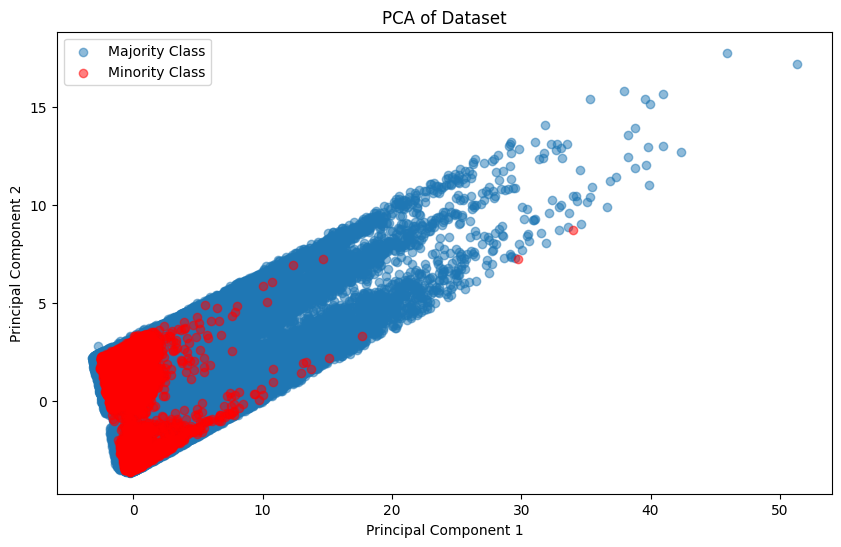

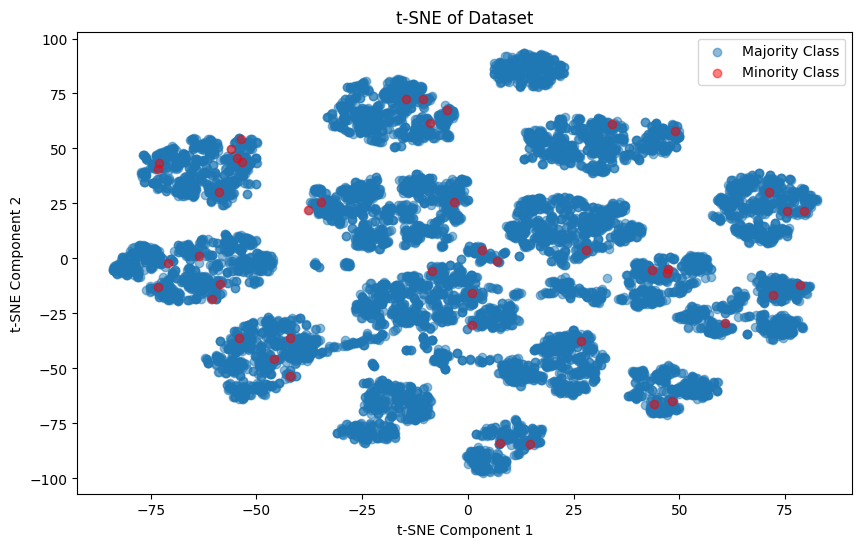

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load dataset
train_file_path = r"D:\dissertation\fraudTrain_v9_20250704_with_new_features.csv"
df_train = pd.read_csv(train_file_path)

# Drop unnecessary columns
columns_to_drop = ['trans_date_trans_time', 'dob', 'trans_num', 'is_fraud']
X_train = df_train.drop(columns=columns_to_drop, errors='ignore')
y_train = df_train['is_fraud']

# One-hot encode categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

if not categorical_columns.empty:
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]),
                                   columns=encoder.get_feature_names_out(categorical_columns),
                                   index=X_train.index)
    X_train = X_train.drop(columns=categorical_columns).join(X_train_encoded)

# Replace inf/-inf with NaN and fill NaN with 0
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(0)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[y_train == 0, 0], X_pca[y_train == 0, 1], label='Majority Class', alpha=0.5)
plt.scatter(X_pca[y_train == 1, 0], X_pca[y_train == 1, 1], label='Minority Class', alpha=0.5, color='red')
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# t-SNE on a 10,000 sample subset
sample_size = 10000
X_train_sampled = X_train_scaled[np.random.choice(X_train_scaled.shape[0], sample_size, replace=False)]
y_train_sampled = y_train.iloc[np.random.choice(y_train.shape[0], sample_size, replace=False)].reset_index(drop=True)

tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(X_train_sampled)

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[y_train_sampled == 0, 0], X_tsne[y_train_sampled == 0, 1], label='Majority Class', alpha=0.5)
plt.scatter(X_tsne[y_train_sampled == 1, 0], X_tsne[y_train_sampled == 1, 1], label='Minority Class', alpha=0.5, color='red')
plt.title('t-SNE of Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


In [19]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime

train_file = r"D:\dissertation\fraudTrain_v9_20250704_with_new_features.csv"
df_train = pd.read_csv(train_file)

# Drop non-feature columns and target
columns_to_drop = ['trans_date_trans_time', 'dob', 'trans_num']
X_train = df_train.drop(columns=columns_to_drop + ['is_fraud'], errors='ignore')
y_train = df_train['is_fraud']

print("Class distribution before applying SMOTE:")
print(y_train.value_counts())

# One-hot encode categorical columns if present
categorical_columns = X_train.select_dtypes(include=['object']).columns
if not categorical_columns.empty:
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]),
                                   columns=encoder.get_feature_names_out(categorical_columns),
                                   index=X_train.index)
    X_train = X_train.drop(columns=categorical_columns).join(X_train_encoded)

# Replace inf, -inf with NaN and then fill NaN with 0
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(0)

# Apply SMOTE to balance the dataset
desired_ratio = 0.5
smote = SMOTE(sampling_strategy=desired_ratio, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nClass distribution after applying SMOTE:")
print(y_train_smote.value_counts())

# Save the new dataset
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
train_output_file = f'D:\\dissertation\\fraudTrain_v10_{current_time}.csv'
df_train_smote = pd.concat([pd.DataFrame(X_train_smote), y_train_smote.reset_index(drop=True)], axis=1)
df_train_smote.to_csv(train_output_file, index=False)

print(f"Processed training data saved to: {train_output_file}")


Class distribution before applying SMOTE:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Class distribution after applying SMOTE:
is_fraud
0    1289169
1     644584
Name: count, dtype: int64
Processed training data saved to: D:\dissertation\fraudTrain_v10_20250705_233904.csv


In [ ]:
# 1. 3 to 4:Unnamed: 0, amt, category, etc.  updates or corrections in specific records or their corresponding values.

# 2. 4 to 5: Changes in time-related features such as day_of_week, hour_of_day, and time_of_day

# 3.5 to 6:time_diff column

# 4.6 to 7:  Changes observed in amt, amt_change_rate, and time_diff.

# 5.7 to 8  Updates in amt, amt_change_rate, category_entertainment, and other categorical fields, pointing to revisions in transaction categorization or feature calculation.

# 6.8 to 9  Differences in cc_num, amt, zip, lat, long, and other columns, indicating updates to geographic data and transaction amounts.

# 7.9 to 10 Changes in multiple fields such as amt, amt_change_rate, category_entertainment, category_food_dining, 

In [ ]:
pip install psutil

In [18]:
import psutil
import os
import platform
from datetime import datetime

# Function to get system information
def get_system_info():
    print("="*40, "System Information", "="*40)
    print(f"System: {platform.system()}")
    print(f"Node Name: {platform.node()}")
    print(f"Release: {platform.release()}")
    print(f"Version: {platform.version()}")
    print(f"Machine: {platform.machine()}")
    print(f"Processor: {platform.processor()}")
    print(f"CPU Count: {psutil.cpu_count(logical=True)}")

# Function to get CPU information
def get_cpu_info():
    print("="*40, "CPU Info", "="*40)
    print(f"Physical cores: {psutil.cpu_count(logical=False)}")
    print(f"Total cores: {psutil.cpu_count(logical=True)}")
    print(f"Max Frequency: {psutil.cpu_freq().max:.2f}Mhz")
    print(f"Min Frequency: {psutil.cpu_freq().min:.2f}Mhz")
    print(f"Current Frequency: {psutil.cpu_freq().current:.2f}Mhz")
    print(f"CPU Usage Per Core: {psutil.cpu_percent(percpu=True)}")
    print(f"Total CPU Usage: {psutil.cpu_percent()}%")

# Function to get memory information
def get_memory_info():
    print("="*40, "Memory Information", "="*40)
    svmem = psutil.virtual_memory()
    print(f"Total: {get_size(svmem.total)}")
    print(f"Available: {get_size(svmem.available)}")
    print(f"Used: {get_size(svmem.used)}")
    print(f"Percentage: {svmem.percent}%")

# Function to get disk usage
def get_disk_info():
    print("="*40, "Disk Information", "="*40)
    partitions = psutil.disk_partitions()
    for partition in partitions:
        print(f"=== Device: {partition.device} ===")
        print(f"  Mountpoint: {partition.mountpoint}")
        print(f"  File system type: {partition.fstype}")
        try:
            partition_usage = psutil.disk_usage(partition.mountpoint)
            print(f"  Total Size: {get_size(partition_usage.total)}")
            print(f"  Used: {get_size(partition_usage.used)}")
            print(f"  Free: {get_size(partition_usage.free)}")
            print(f"  Percentage: {partition_usage.percent}%")
        except PermissionError:
            continue

# Function to get network information
def get_network_info():
    print("="*40, "Network Information", "="*40)
    net_io = psutil.net_io_counters()
    print(f"Total Bytes Sent: {get_size(net_io.bytes_sent)}")
    print(f"Total Bytes Received: {get_size(net_io.bytes_recv)}")

# Helper function to convert bytes to more readable units
def get_size(bytes, suffix="B"):
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor

# Call all functions to display system information
if __name__ == "__main__":
    get_system_info()
    get_cpu_info()
    get_memory_info()
    get_disk_info()
    get_network_info()


======================================== System Information ========================================
System: Windows
Node Name: Acer-NB1
Release: 10
Version: 10.0.26100
Machine: AMD64
Processor: Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU Count: 8
======================================== CPU Info ========================================
Physical cores: 4
Total cores: 8
Max Frequency: 1800.00Mhz
Min Frequency: 0.00Mhz
Current Frequency: 1600.00Mhz
CPU Usage Per Core: [14.7, 10.7, 21.1, 13.5, 13.7, 7.0, 10.5, 7.8]
Total CPU Usage: 12.4%
======================================== Memory Information ========================================
Total: 7.88GB
Available: 1.70GB
Used: 6.18GB
Percentage: 78.4%
======================================== Disk Information ========================================
=== Device: C:\ ===
  Mountpoint: C:\
  File system type: NTFS
  Total Size: 237.35GB
  Used: 124.60GB
  Free: 112.75GB
  Percentage: 52.5%
=== Device: D:\ ===
  Mountpoint: D:\
  Fil

In [ ]:
#16 model SVM, KNN, RF, Bagging, Boosting Combines

In [ ]:
#16-1 SVM

In [ ]:
import pandas as pd# Check and well done:)

train_file_path = r"D:\dissertation\fraudTrain_v10_20250705_233904.csv"
df_train = pd.read_csv(train_file_path)

categorical_columns = df_train.select_dtypes(include=['object']).columns

if categorical_columns.empty:
    print("No categorical variables found. They have been processed.")
else:
    print(f"Categorical variables found: {categorical_columns.tolist()}")

print(df_train.describe())

No categorical variables found. They have been processed.
             cc_num           amt           zip           lat          long  \
count  1.933753e+06  1.933753e+06  1.933753e+06  1.933753e+06  1.933753e+06   
mean   4.114152e+17  9.294300e-01  4.853817e+04  8.510359e-03  7.766222e-03   
std    1.298076e+18  1.769175e+00  2.699628e+04  1.005705e+00  1.011993e+00   
min    6.041621e+10  0.000000e+00  1.257000e+03 -3.646814e+00 -5.483362e+00   
25%    1.800429e+14  0.000000e+00  2.544200e+04 -7.405171e-01 -4.768174e-01   
50%    3.523898e+15  0.000000e+00  4.786900e+04  1.652503e-01  2.155767e-01   
75%    4.642255e+15  1.000000e+00  7.196000e+04  6.720466e-01  7.341727e-01   
max    4.992346e+18  1.800000e+02  9.978300e+04  5.547035e+00  1.619007e+00   

           city_pop     unix_time     merch_lat    merch_long  \
count  1.933753e+06  1.933753e+06  1.933753e+06  1.933753e+06   
mean   9.317393e-03  1.348952e+09  8.041860e-03  7.738386e-03   
std    1.026819e+00  1.317285e+07  

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

train_file_path = r"D:\dissertation\fraudTrain_v10_20250705_233904.csv"
test_file_path = r"D:\dissertation\fraudTest_v9_20250704_with_new_features.csv"
df_train = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

columns_to_drop = ['is_fraud', 'trans_date_trans_time', 'dob', 'trans_num']
X_train = df_train.drop(columns=columns_to_drop, errors='ignore')
y_train = df_train['is_fraud']
X_val = df_test.drop(columns=columns_to_drop, errors='ignore')
y_val = df_test['is_fraud']

# OneHotEncoding for 'time_of_day' if exists
if 'time_of_day' in X_val.columns:
    print("Need to perform OneHotEncoding on 'time_of_day' in the test set")
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    X_val_encoded = pd.DataFrame(encoder.fit_transform(X_val[['time_of_day']]),
                                 columns=encoder.get_feature_names_out(['time_of_day']),
                                 index=X_val.index)
    X_val = X_val.drop(columns=['time_of_day']).join(X_val_encoded)
else:
    print("'time_of_day' is not a categorical feature in the test set")

# Replace inf/-inf and NaN in test data
X_val = X_val.replace([np.inf, -np.inf], np.nan)
X_val = X_val.fillna(0)

# Standardize
print("Standardizing data")
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


Need to perform OneHotEncoding on 'time_of_day' in the test set
Standardizing data


In [3]:
import pandas as pd

# Correct file paths based on your actual folder
files = {
    "v9_train": r"D:\dissertation\fraudTrain_v9_20250704_with_new_features.csv",
    "v9_test": r"D:\dissertation\fraudTest_v9_20250704_with_new_features.csv",
    "v10_train": r"D:\dissertation\fraudTrain_v10_processed.csv",
    "v10_test": r"D:\dissertation\fraudTest_v10_processed.csv",
    "v11_train": r"D:\dissertation\fraudTrain_v11.csv",
    "v11_test": r"D:\dissertation\fraudTest_v11.csv",
}

# Read and inspect
for version, path in files.items():
    print(f"\n=== {version} ===")
    try:
        df = pd.read_csv(path)
        print(f"Shape: {df.shape}")
        print(f"Columns:\n{df.columns.tolist()}\n")
        print(f"First row:\n{df.iloc[0]}\n")
    except Exception as e:
        print(f"Failed to load {version}: {e}")



=== v9_train ===
Shape: (1296675, 44)
Columns:
['trans_date_trans_time', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'time_diff_seconds', 'time_diff_hours', 'time_diff_minutes', 'year', 'month', 'day', 'hour', 'category_entertainment', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'gender_F', 'gender_M', 'day_of_week', 'time_of_day', 'hour_of_day', 'time_diff', 'amt_change_rate', 'normal_time_diff_hr', 'fraud_time_diff_hr', 'change_ratio']

First row:
trans_date_trans_time                   2019-01-01 12:47:15
cc_num                                          60416207185
amt                                                       0
zip                          

In [ ]:
# Larger C values ​​focus more on correct classification. 0.001~1000
# loss function, penalizes misclassification, decision boundary.
# gradient on one or a small batch of data points during each iteration, find parameters (generalization) , may converge slowly.

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# File paths
train_path = r"D:\dissertation\fraudTrain_v9_20250704_with_new_features.csv"
test_path = r"D:\dissertation\fraudTest_v9_20250704_with_new_features.csv"
train_output = r"D:\dissertation\fraudTrain_v10_processed.csv"
test_output = r"D:\dissertation\fraudTest_v10_processed.csv"

# Load data
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Drop unnecessary columns
columns_to_drop = ['trans_date_trans_time', 'dob', 'trans_num', 'cc_num']
X_train = df_train.drop(columns=columns_to_drop + ['is_fraud'], errors='ignore')
y_train = df_train['is_fraud']
X_test = df_test.drop(columns=columns_to_drop + ['is_fraud'], errors='ignore')
y_test = df_test['is_fraud']

# Handle categorical columns (OneHotEncode)
categorical_columns = X_train.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]),
                               columns=encoder.get_feature_names_out(categorical_columns),
                               index=X_train.index)
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_columns]),
                              columns=encoder.get_feature_names_out(categorical_columns),
                              index=X_test.index)

# Combine encoded categorical columns with numerical features
X_train = X_train.drop(columns=categorical_columns).join(X_train_encoded)
X_test = X_test.drop(columns=categorical_columns).join(X_test_encoded)

# Replace inf/-inf with 0, NaN with 0
X_train.replace([np.inf, -np.inf], 0, inplace=True)
X_test.replace([np.inf, -np.inf], 0, inplace=True)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Keep column names before standardization
final_columns = X_train.columns.tolist()

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame with correct columns
X_train_df = pd.DataFrame(X_train_scaled, columns=final_columns, index=X_train.index)
X_test_df = pd.DataFrame(X_test_scaled, columns=final_columns, index=X_test.index)

# Add target back
X_train_df['is_fraud'] = y_train.values
X_test_df['is_fraud'] = y_test.values

# Save processed data
X_train_df.to_csv(train_output, index=False)
X_test_df.to_csv(test_output, index=False)

print(f"Saved processed training data to: {train_output}")
print(f"Saved processed test data to: {test_output}")


Saved processed training data to: D:\dissertation\fraudTrain_v10_processed.csv
Saved processed test data to: D:\dissertation\fraudTest_v10_processed.csv


In [12]:
import os
import pandas as pd

# File paths
train_file_path = r"D:\dissertation\fraudTrain_v10_processed.csv"
test_file_path = r"D:\dissertation\fraudTest_v10_processed.csv"
output_folder = r"D:\dissertation"  # Unified output folder

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Load data
df_train = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

# Separate features and target
columns_to_drop = ['is_fraud']
X_train = df_train.drop(columns=columns_to_drop, errors='ignore')
y_train = df_train['is_fraud']
X_val = df_test.drop(columns=columns_to_drop, errors='ignore')
y_val = df_test['is_fraud']

# Check label distribution
print("Training label distribution:")
print(y_train.value_counts())
print("\nValidation label distribution:")
print(y_val.value_counts())

# Check for unexpected categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
if not categorical_columns.empty:
    print("\nWarning: Unexpected categorical columns detected. Applying One-Hot Encoding.")
    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
    X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]),
                                   columns=encoder.get_feature_names_out(categorical_columns),
                                   index=X_train.index)
    X_val_encoded = pd.DataFrame(encoder.transform(X_val[categorical_columns]),
                                 columns=encoder.get_feature_names_out(categorical_columns),
                                 index=X_val.index)
    X_train = X_train.drop(columns=categorical_columns).join(X_train_encoded)
    X_val = X_val.drop(columns=categorical_columns).join(X_val_encoded)
else:
    print("\nNo categorical columns detected. Skipping One-Hot Encoding.")

# Combine features and labels before saving
df_train_combined = pd.concat([X_train, y_train.rename('is_fraud')], axis=1)
df_val_combined = pd.concat([X_val, y_val.rename('is_fraud')], axis=1)

# Save combined data
df_train_combined.to_csv(os.path.join(output_folder, 'fraudTrain_v11.csv'), index=False)
df_val_combined.to_csv(os.path.join(output_folder, 'fraudTest_v11.csv'), index=False)

print(f"\nCombined processed data saved to: {output_folder}")


Training label distribution:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Validation label distribution:
is_fraud
0    553574
1      2145
Name: count, dtype: int64

No categorical columns detected. Skipping One-Hot Encoding.

Combined processed data saved to: D:\dissertation


In [13]:
import pandas as pd

# Read saved data
df_train = pd.read_csv(r"D:\dissertation\fraudTrain_v11.csv")
df_test = pd.read_csv(r"D:\dissertation\fraudTest_v11.csv")

# Check columns
print("\n[Training Columns]")
print(df_train.columns.tolist())

# Check first few rows
print("\n[First 3 rows of training data]")
print(df_train.head(3))

# Quick shape and null check
print("\n[Shape]")
print(df_train.shape)
print(df_test.shape)

print("\n[Missing value check]")
print(df_train.isnull().sum())
print(df_test.isnull().sum())



[Training Columns]
['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'time_diff_seconds', 'time_diff_hours', 'time_diff_minutes', 'year', 'month', 'day', 'hour', 'category_entertainment', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'gender_F', 'gender_M', 'day_of_week', 'hour_of_day', 'time_diff', 'amt_change_rate', 'normal_time_diff_hr', 'fraud_time_diff_hr', 'change_ratio', 'time_of_day_Evening (18:00 - 22:59)', 'time_of_day_Morning (05:00 - 11:59)', 'time_of_day_Night (23:00 - 04:59)', 'is_fraud']

[First 3 rows of training data]
        amt     zip       lat      long  city_pop  unix_time  merch_lat  \
0 -0.154944  1.2536  0.880092 -1.356928 -0.288715  -1.855081   1.064110   
1 -0.154944  1.2536  

In [15]:
import pandas as pd
from sklearn.utils import resample

# Correct file paths
train_path = r"D:\dissertation\fraudTrain_v11.csv"
test_path = r"D:\dissertation\fraudTest_v11.csv"

# Load data
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Separate features and labels
X_train = df_train.drop(columns=['is_fraud'])
y_train = df_train['is_fraud']
X_val = df_test.drop(columns=['is_fraud'])
y_val = df_test['is_fraud']

# Label distribution before resampling
print("Original training label distribution:")
print(y_train.value_counts())

# Downsampling
df_train_full = pd.concat([X_train, y_train], axis=1)
fraud_samples = df_train_full[df_train_full['is_fraud'] == 1]
non_fraud_samples = df_train_full[df_train_full['is_fraud'] == 0]
non_fraud_downsampled = resample(non_fraud_samples, 
                                 replace=False, 
                                 n_samples=len(fraud_samples) * 2, 
                                 random_state=42)

df_train_resampled = pd.concat([fraud_samples, non_fraud_downsampled])

# Final separation after resampling
X_train_resampled = df_train_resampled.drop(columns=['is_fraud'])
y_train_resampled = df_train_resampled['is_fraud']

# Shape check
print(f"\nShape of X_train_resampled: {X_train_resampled.shape}")
print(f"Shape of X_val: {X_val.shape}")

if X_train_resampled.shape[1] == X_val.shape[1]:
    print("Training and validation feature count is consistent.")
else:
    print("Warning: Feature count mismatch between training and validation sets.")


Original training label distribution:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Shape of X_train_resampled: (22518, 41)
Shape of X_val: (555719, 41)
Training and validation feature count is consistent.


In [8]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

# === File Paths ===
train_path = r"D:\dissertation\fraudTrain_v11.csv"
output_path = r"D:\dissertation\fraudTrain_v12.csv"

# === Load training data ===
df_train = pd.read_csv(train_path)
X_train = df_train.drop(columns=['is_fraud'])
y_train = df_train['is_fraud']

print("Original class distribution:")
print(y_train.value_counts())

# === Calculate target fraud count (1:2 ratio) ===
total_non_fraud = sum(y_train == 0)
target_fraud = total_non_fraud // 2
current_fraud = sum(y_train == 1)

# Calculate sampling ratio for SMOTE
sampling_ratio = target_fraud / current_fraud
sampling_ratio = min(sampling_ratio, 1.0)  # Cannot exceed 1.0

print(f"\nTarget fraud count: {target_fraud}")
print(f"SMOTE sampling_strategy: {sampling_ratio:.2f}")

# === Apply SMOTE ===
smote = SMOTE(sampling_strategy=sampling_ratio, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# === Save resampled data ===
df_resampled = pd.DataFrame(X_resampled, columns=X_train.columns)
df_resampled['is_fraud'] = y_resampled
df_resampled.to_csv(output_path, index=False)

print("\nNew class distribution:")
print(y_resampled.value_counts())
print(f"\nResampled training data saved to: {output_path}")


Original class distribution:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Target fraud count: 644584
SMOTE sampling_strategy: 1.00

New class distribution:
is_fraud
0    1289169
1    1289169
Name: count, dtype: int64

Resampled training data saved to: D:\dissertation\fraudTrain_v12.csv


In [ ]:
# svm1 0908

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import joblib
import time
from scipy.stats import uniform

# File paths
train_file_path = r"D:\dissertation\fraudTrain_v12.csv"
test_file_path = r"D:\dissertation\fraudTest_v11.csv"
model_output_path = r"D:\dissertation\best_svm_model.pkl"

# Load and sample data
df_train = pd.read_csv(train_file_path).sample(frac=0.005, random_state=42)
df_test = pd.read_csv(test_file_path).sample(frac=0.02, random_state=42)

# Separate features and labels
X_train = df_train.drop(columns=['is_fraud'])
y_train = df_train['is_fraud'].values
X_val = df_test.drop(columns=['is_fraud'])
y_val = df_test['is_fraud'].values

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define parameter search space
param_dist = {
    'C': uniform(0.1, 10),
    'kernel': ['linear'],
    'gamma': ['scale']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    SVC(probability=True),
    param_distributions=param_dist,
    n_iter=6,
    cv=2,
    scoring='roc_auc',
    random_state=42
)

# Train model
print("Training RandomizedSearchCV...")
start_time = time.time()
random_search.fit(X_train_scaled, y_train)
end_time = time.time()
print(f"Training completed in {end_time - start_time:.2f} seconds")

# Save best model
joblib.dump(random_search.best_estimator_, model_output_path)
print(f"Best SVM model saved successfully to {model_output_path}.")

# Evaluate on validation set
y_pred_val = random_search.best_estimator_.predict(X_val_scaled)
roc_auc = roc_auc_score(y_val, y_pred_val)
print(f"\nFinal SVM Model ROC-AUC Score: {roc_auc:.4f}")

print("\nClassification Report:\n", classification_report(y_val, y_pred_val))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))

# Model coefficients (only valid for linear kernel)
try:
    print("\nModel coefficients:\n", random_search.best_estimator_.coef_)
except AttributeError:
    print("\nModel coefficients are not available for this model.")

# Output parameter search results
results = pd.DataFrame(random_search.cv_results_)
print("\nParameter Search Results:\n")
print(results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])


Training RandomizedSearchCV...
Training completed in 293.58 seconds
Best SVM model saved successfully to D:\dissertation\best_svm_model.pkl.

Final SVM Model ROC-AUC Score: 0.8714

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     11069
           1       0.05      0.80      0.10        45

    accuracy                           0.94     11114
   macro avg       0.53      0.87      0.54     11114
weighted avg       1.00      0.94      0.97     11114

Confusion Matrix:
 [[10435   634]
 [    9    36]]

Model coefficients:
 [[ 4.80472464e+00  1.36741564e-01 -1.10508625e-01  3.23867278e-01
  -4.91745953e-02 -6.26210621e-03  1.29515991e-01 -1.82877419e-01
   9.60955705e-02 -4.01999345e-01  9.27767220e-02 -3.00965683e-02
  -8.94467524e-02 -3.14291253e-03  1.84772881e-01 -2.28112987e-01
   1.53902576e-01  5.13534978e-01  2.28058582e-01  3.99478858e-01
   1.30638525e-01  1.50054261e-03  1.66210253e-01 -2.85269325e-01


In [ ]:
import os
print(os.getcwd())

c:\Users\User\Desktop


In [ ]:
#knn1

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from scipy.stats import randint
import joblib
import time

# === File paths ===
train_file_path = r"D:\dissertation\fraudTrain_v12.csv"
test_file_path = r"D:\dissertation\fraudTest_v11.csv"
model_output_path = r"D:\dissertation\best_knn_model.pkl"

# === Load and sample data ===
df_train = pd.read_csv(train_file_path).sample(frac=0.005, random_state=42)
df_test = pd.read_csv(test_file_path).sample(frac=0.02, random_state=42)

X_train = df_train.drop(columns=['is_fraud'])
y_train = df_train['is_fraud'].values
X_val = df_test.drop(columns=['is_fraud'])
y_val = df_test['is_fraud'].values

# === Feature scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# === Define model and hyperparameter search space ===
knn_params = {
    'estimator__n_neighbors': randint(1, 5),
    'estimator__weights': ['uniform', 'distance'],
    'estimator__leaf_size': randint(20, 50),
    'estimator__p': [2],
    'estimator__metric': ['minkowski']
}

knn_model = KNeighborsClassifier()
bagging_knn = BaggingClassifier(estimator=knn_model, random_state=42, n_jobs=1)

random_search = RandomizedSearchCV(
    bagging_knn, param_distributions=knn_params,
    n_iter=3, scoring='roc_auc', n_jobs=1, cv=2, random_state=42
)

# === Train model ===
print("Training with RandomizedSearchCV...")
start_time = time.time()
random_search.fit(X_train_scaled, y_train)
end_time = time.time()
print(f"Training completed in {end_time - start_time:.2f} seconds")

# === Save model ===
best_model = random_search.best_estimator_
joblib.dump(best_model, model_output_path)
print(f"Best KNN model saved successfully to {model_output_path}.")

# === Evaluate ===
y_pred_val = best_model.predict(X_val_scaled)
roc_auc = roc_auc_score(y_val, y_pred_val)
print(f"\nFinal KNN Model ROC-AUC Score: {roc_auc:.4f}")

print("\nClassification Report:\n", classification_report(y_val, y_pred_val))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))

# === Output hyperparameter search results ===
results = pd.DataFrame(random_search.cv_results_)
print("\nParameter Search Results:\n")
print(results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])


Training with RandomizedSearchCV...
Training completed in 12.32 seconds
Best KNN model saved successfully to D:\dissertation\best_knn_model.pkl.

Final KNN Model ROC-AUC Score: 0.7618

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.90     11069
           1       0.02      0.71      0.03        45

    accuracy                           0.81     11114
   macro avg       0.51      0.76      0.46     11114
weighted avg       0.99      0.81      0.89     11114

Confusion Matrix:
 [[8994 2075]
 [  13   32]]

Parameter Search Results:

                                              params  mean_test_score  \
0  {'estimator__leaf_size': 26, 'estimator__metri...         0.941657   
1  {'estimator__leaf_size': 34, 'estimator__metri...         0.944182   
2  {'estimator__leaf_size': 48, 'estimator__metri...         0.926273   

   std_test_score  rank_test_score  
0        0.000654                2  
1        0.000783      

In [ ]:
#RF1

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import joblib
import time
from scipy.stats import randint

# === File paths updated ===
train_file_path = r"D:\dissertation\fraudTrain_v12.csv"
test_file_path = r"D:\dissertation\fraudTest_v11.csv"
model_output_path = r"D:\dissertation\best_rf_model.pkl"

# === Load and sample data ===
df_train = pd.read_csv(train_file_path).sample(frac=0.005, random_state=42)
df_test = pd.read_csv(test_file_path).sample(frac=0.02, random_state=42)

X_train = df_train.drop(columns=['is_fraud'])
y_train = df_train['is_fraud'].values
X_val = df_test.drop(columns=['is_fraud'])
y_val = df_test['is_fraud'].values

# === Feature scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# === Define parameter search space ===
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', None]
}

# === Initialize RandomizedSearchCV ===
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=6,
    cv=2,
    scoring='roc_auc',
    random_state=42
)

# === Train model ===
print("Training RandomizedSearchCV with RandomForest...")
start_time = time.time()
random_search.fit(X_train_scaled, y_train)
end_time = time.time()
print(f"Training completed in {end_time - start_time:.2f} seconds")

# === Save best model ===
joblib.dump(random_search.best_estimator_, model_output_path)
print(f"Best Random Forest model saved successfully to {model_output_path}.")

# === Evaluate ===
y_pred_val = random_search.best_estimator_.predict(X_val_scaled)
roc_auc = roc_auc_score(y_val, y_pred_val)
print(f"\nFinal Random Forest Model ROC-AUC Score: {roc_auc:.4f}")

print("\nClassification Report:\n", classification_report(y_val, y_pred_val))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))

# === Output parameter search results ===
results = pd.DataFrame(random_search.cv_results_)
print("\nParameter Search Results:\n")
print(results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])


Training RandomizedSearchCV with RandomForest...
Training completed in 26.49 seconds
Best Random Forest model saved successfully to D:\dissertation\best_rf_model.pkl.

Final Random Forest Model ROC-AUC Score: 0.9157

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     11069
           1       0.09      0.87      0.16        45

    accuracy                           0.96     11114
   macro avg       0.55      0.92      0.57     11114
weighted avg       1.00      0.96      0.98     11114

Confusion Matrix:
 [[10679   390]
 [    6    39]]

Parameter Search Results:

                                              params  mean_test_score  \
0  {'class_weight': 'balanced', 'max_depth': 17, ...         0.989784   
1  {'class_weight': 'balanced', 'max_depth': 13, ...         0.991683   
2  {'class_weight': None, 'max_depth': 4, 'max_fe...         0.974223   
3  {'class_weight': None, 'max_depth': 3, 'max_fe...         0

In [ ]:
#save each model # !!! soft score to decided

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import joblib
import time

# === Load models ===
svm_model = joblib.load(r"D:\dissertation\best_svm_model.pkl")
knn_model = joblib.load(r"D:\dissertation\best_knn_model.pkl")
rf_model = joblib.load(r"D:\dissertation\best_rf_model.pkl")

# === File paths ===
train_file_path = r"D:\dissertation\fraudTrain_v12.csv"
test_file_path = r"D:\dissertation\fraudTest_v11.csv"
model_output_path = r"D:\dissertation\best_voting_model.pkl"
scaler_output_path = r"D:\dissertation\scaler.pkl"

# === Load and sample data ===
df_train = pd.read_csv(train_file_path).sample(frac=0.005, random_state=42)
df_test = pd.read_csv(test_file_path).sample(frac=0.02, random_state=42)

# === Separate features and labels ===
X_train = df_train.drop(columns=['is_fraud'])
y_train = df_train['is_fraud'].values
X_val = df_test.drop(columns=['is_fraud'])
y_val = df_test['is_fraud'].values

# === Feature scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# === Save scaler for cloud deployment ===
joblib.dump(scaler, scaler_output_path)
print(f"Scaler saved successfully to {scaler_output_path}.")

# === Define voting ensemble ===
voting_clf = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('knn', knn_model),
    ('rf', rf_model)
], voting='soft')

# === Train ensemble ===
start_time = time.time()
voting_clf.fit(X_train_scaled, y_train)
end_time = time.time()
print(f"Training completed in {end_time - start_time:.2f} seconds")

# === Predict probabilities for manual check ===
svm_proba = svm_model.predict_proba(X_val_scaled)
knn_proba = knn_model.predict_proba(X_val_scaled)
rf_proba = rf_model.predict_proba(X_val_scaled)
avg_proba = (svm_proba + knn_proba + rf_proba) / 3

print("SVM probabilities (first 5):\n", svm_proba[:5])
print("KNN probabilities (first 5):\n", knn_proba[:5])
print("Random Forest probabilities (first 5):\n", rf_proba[:5])
print("Manually averaged probabilities (first 5):\n", avg_proba[:5])

# === Voting classifier predictions ===
voting_proba = voting_clf.predict_proba(X_val_scaled)
print("Voting Classifier probabilities (first 5):\n", voting_proba[:5])

y_pred_voting = voting_clf.predict(X_val_scaled)

# === Evaluation ===
print("Ensemble Model Accuracy:", accuracy_score(y_val, y_pred_voting))
print("Ensemble ROC-AUC Score:", roc_auc_score(y_val, y_pred_voting))
print("Ensemble Classification Report:\n", classification_report(y_val, y_pred_voting))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_voting))

# === Save ensemble model ===
joblib.dump(voting_clf, model_output_path)
print(f"Best Voting model saved successfully to {model_output_path}.")


Scaler saved successfully to D:\dissertation\scaler.pkl.
Training completed in 47.42 seconds
SVM probabilities (first 5):
 [[9.69795670e-01 3.02043303e-02]
 [9.94541448e-01 5.45855214e-03]
 [6.99357019e-01 3.00642981e-01]
 [9.99282453e-01 7.17547475e-04]
 [9.99141761e-01 8.58239201e-04]]
KNN probabilities (first 5):
 [[1.         0.        ]
 [1.         0.        ]
 [0.40025513 0.59974487]
 [1.         0.        ]
 [1.         0.        ]]
Random Forest probabilities (first 5):
 [[0.98241444 0.01758556]
 [0.73422338 0.26577662]
 [0.81741513 0.18258487]
 [0.97210833 0.02789167]
 [0.95826259 0.04173741]]
Manually averaged probabilities (first 5):
 [[0.98407004 0.01592996]
 [0.90958828 0.09041172]
 [0.63900909 0.36099091]
 [0.99046359 0.00953641]
 [0.98580145 0.01419855]]
Voting Classifier probabilities (first 5):
 [[0.98411314 0.01588686]
 [0.90960337 0.09039663]
 [0.6388784  0.3611216 ]
 [0.9904667  0.0095333 ]
 [0.98580505 0.01419495]]
Ensemble Model Accuracy: 0.9533021414432248
Ensem

In [ ]:
pip install joblib

   ---------------------------------------- 0.0/307.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/307.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/307.7 kB ? eta -:--:--
   --- ----------------------------------- 30.7/307.7 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/307.7 kB 245.8 kB/s eta 0:00:02
   ------------- ------------------------ 112.6/307.7 kB 595.3 kB/s eta 0:00:01
   --------------------------- ---------- 225.3/307.7 kB 919.0 kB/s eta 0:00:01
   ---------------------------------------- 307.7/307.7 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import os
os.getcwd()


'c:\\Users\\User\\Desktop'